EPOC demographic and clinical data

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

from src.configs import configs

/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
epoc = pd.read_spss("%s/EPOC/EPOC_data_forSP9_mLPP.sav" % configs.PROJECT_ROOT)

/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/io/spss.py:66: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df, metadata = pyreadstat.read_sav(
/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/io/spss.py:6

In [3]:
epoc.head()

,Code,Code2,Familiencode,Relation,Status,StatusOCD_binary,Center,Gruppe_Neu,Sample_verlaufBerlin,Finish_vsQuit,...,Cz_400to1000_Av_pos_sweet_GC,Cz_400to1000_Av_pos_affiliation_GC,Cz_400to1000_Av_neg_GC,Cz_400to1000_Av_neg_human_GC,Cz_400to1000_Av_neg_nature_GC,Cz_400to1000_Av_neg_weapons_GC,Cz_400to1000_Av_neutr_GC,Cz_400to1000_Av_neutr_living_GC,Cz_400to1000_Av_neutr_items_GC,Cz_400to1000_Av_neutr_environs_GC
0,epoc_p_1112,EPOC_P_1112,3196.0,Index ohne Verwandte,Index,1.0,Berlin,OCD_Med,1.0,reguläres Therapieende,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,epoc_p_1064,EPOC_P_1064,3128.0,Index ohne Verwandte,Index,1.0,Berlin,OCD_Med,1.0,reguläres Therapieende,...,2.407063,3.327511,5.650495,8.410168,2.938624,5.536354,1.214722,2.711010,2.457612,-1.477090
2,epoc_p_1118,EPOC_P_1118,3208.0,Index ohne Verwandte,Index,1.0,Berlin,OCD_Med,1.0,reguläres Therapieende,...,1.433177,0.518778,5.951720,0.995575,2.376250,14.205409,-4.424898,-3.708006,-4.273278,-5.553788
3,epoc_p_1050,EPOC_P_1050,3094.0,Index ohne Verwandte,Index,1.0,Berlin,OCD_Med,1.0,Therapieabbruch,...,2.677901,-2.315895,0.443861,-3.399431,1.612670,3.196841,-2.968737,-4.438069,-0.721836,-3.652792
4,epoc_p_1069,EPOC_P_1069,3133.0,Index ohne Verwandte,Index,1.0,Berlin,OCD_Med,1.0,reguläres Therapieende,...,-0.221830,1.038309,2.689956,0.585481,6.851810,0.681768,-0.506852,1.956024,-1.882689,-1.629634


In [4]:
epoc.shape

(304, 342)

In [5]:
variables = list(epoc)
variables

['Code',
 'Code2',
 'Familiencode',
 'Relation',
 'Status',
 'StatusOCD_binary',
 'Center',
 'Gruppe_Neu',
 'Sample_verlaufBerlin',
 'Finish_vsQuit',
 'NumTherapyHours',
 'EEG',
 'Ausschluss',
 'Ausschluss_Grund',
 'Alter',
 'TextBDay',
 'Geschlecht',
 'Ethnisch',
 'School',
 'F42',
 'F31',
 'F32F33',
 'F34',
 'F38',
 'F40',
 'F41',
 'F43',
 'F45',
 'F50',
 'F60F61',
 'F95',
 'F10',
 'F12',
 'F21',
 'YBOO00T0',
 'YBOO01T0',
 'YBOO02T0',
 'YBOO00A_Abschl_Denkzwaenge',
 'YBOO01A_Abschl_Handlungszw',
 'YBOO02A_Abschl_Gesamt',
 'DeltaYbocs_A_min_T0',
 'Delta_YBocs_T0minA',
 'Ybocs_T0toA_percent',
 'Response',
 'Response_only',
 'Remission',
 'RCI_NorbertPaper',
 'RCI_Norbert_response',
 'RCI_BjoernPaper',
 'RCI_Bjoern_response',
 'RES_T0toA_Ybocs_fullsample',
 'RES_T0toA_Ybocs_ERNsample',
 'MADRS_Summe_T0',
 'BDI_II_Summe',
 'OCI_R',
 'OCI_R_Summe_Gesamt',
 'OCI_R_Summe_Waschen',
 'OCI_R_Summe_Kontrollieren',
 'OCI_R_Summe_Ordnen',
 'OCI_R_Summe_Zwangsgedanken',
 'OCI_R_Summe_Horten',
 'OC

### Variable values inspection

In [6]:
#for col in epoc:
    #print(epoc[col].unique())

epoc['Status'].unique()

['Index', 'Kontrolle']
Categories (2, object): ['Index', 'Kontrolle']

In [7]:
epoc['TextBDay']

0       Text7-Apr-1984
1      Text29-Oct-1962
2       Text4-Aug-1968
3      Text15-Jul-1990
4      Text29-Jun-1982
            ...       
299    Text21-Mar-1961
300    Text10-Oct-1994
301     Text3-Apr-1962
302     Text1-Mar-1966
303    Text21-Sep-1970
Name: TextBDay, Length: 304, dtype: object

In [10]:
epoc['WST_Summe'].value_counts(dropna=False)

33.0    42
34.0    38
32.0    29
31.0    29
30.0    22
35.0    21
29.0    20
27.0    13
28.0    13
36.0    12
37.0     7
NaN      5
26.0     4
24.0     4
22.0     3
38.0     3
39.0     3
20.0     2
18.0     2
19.0     1
11.0     1
13.0     1
14.0     1
9.0      1
23.0     1
42.0     1
21.0     1
16.0     1
25.0     1
Name: WST_Summe, dtype: int64

### Variables distribution

In [4]:
epoc['ZUF001A'].value_counts(dropna=False)

NaN              199
ausgezeichnet     69
gut               36
Name: ZUF001A, dtype: int64

In [5]:
epoc['ZUF002A'].value_counts(dropna=False)

NaN                  199
eindeutig ja          73
im Allgemeinen ja     28
eindeutig nicht        4
Name: ZUF002A, dtype: int64

In [6]:
epoc['ZUF003A'].value_counts(dropna=False)

NaN                                                   199
sie hat fast allen meinen Bedürfnissen entsprochen     74
sie hat den meisten meiner Bedürfnisse entsprochen     31
Name: ZUF003A, dtype: int64

In [7]:
epoc['ZUF004A'].value_counts(dropna=False)

NaN                 199
eindeutig ja         90
ich glaube ja        11
eindeutig nicht       3
ich glaube nicht      1
Name: ZUF004A, dtype: int64

In [8]:
epoc['ZUF005A'].value_counts(dropna=False)

NaN                                 199
sehr zufrieden                       71
weitgehend zufrieden                 30
leidlich oder leicht unzufrieden      2
ziemlich unzufrieden                  2
Name: ZUF005A, dtype: int64

In [9]:
epoc['ZUF006A'].value_counts(dropna=False)

NaN                                 199
ja, sie half eine ganze Menge        88
ja, sie half etwas                   16
nein, sie half  eigentlich nicht      1
Name: ZUF006A, dtype: int64

In [10]:
epoc['ZUF007A'].value_counts(dropna=False)

NaN                                 199
sehr zufrieden                       77
weitgehend zufrieden                 27
leidlich oder leicht unzufrieden      1
Name: ZUF007A, dtype: int64

In [11]:
epoc['ZUF008A'].value_counts(dropna=False)

NaN                199
eindeutig ja        84
ich glaube ja       17
eindeutig nicht      4
Name: ZUF008A, dtype: int64

In [12]:
epoc['ZUFMITA'].value_counts(dropna=False)

NaN      199
4.000     47
3.875     14
3.750      9
3.500      6
3.625      6
3.000      6
3.375      5
3.250      5
2.500      2
3.125      2
2.750      1
2.875      1
2.625      1
Name: ZUFMITA, dtype: int64

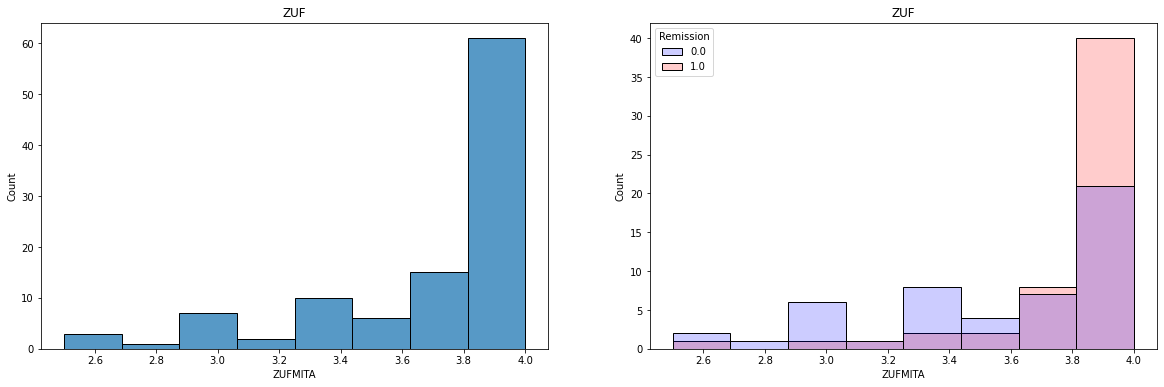

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=epoc, 
             x='ZUFMITA', 
             ax=axes[0]).set_title("ZUF")



sns.histplot(data=epoc, x='ZUFMITA', hue='Remission', palette=['blue','red'], alpha=0.2, 
             ax=axes[1]).set_title("ZUF")



plt.show()

In [65]:
epoc['StatusOCD_binary'].value_counts(dropna=False)

0.0    148
1.0    134
Name: StatusOCD_binary, dtype: int64

In [64]:
epoc['Response'].value_counts(dropna=False)

NaN    163
1.0     72
0.0     47
Name: Response, dtype: int64

In [45]:
epoc['Response_only'].value_counts(dropna=False)

NaN    179
0.0    105
1.0     20
Name: Response_only, dtype: int64

In [66]:
epoc['Remission'].value_counts(dropna=False)

NaN    163
1.0     60
0.0     59
Name: Remission, dtype: int64

In [47]:
epoc['Geschlecht'].value_counts(dropna=False)

Weiblich    169
Männlich    131
NaN           4
Name: Geschlecht, dtype: int64

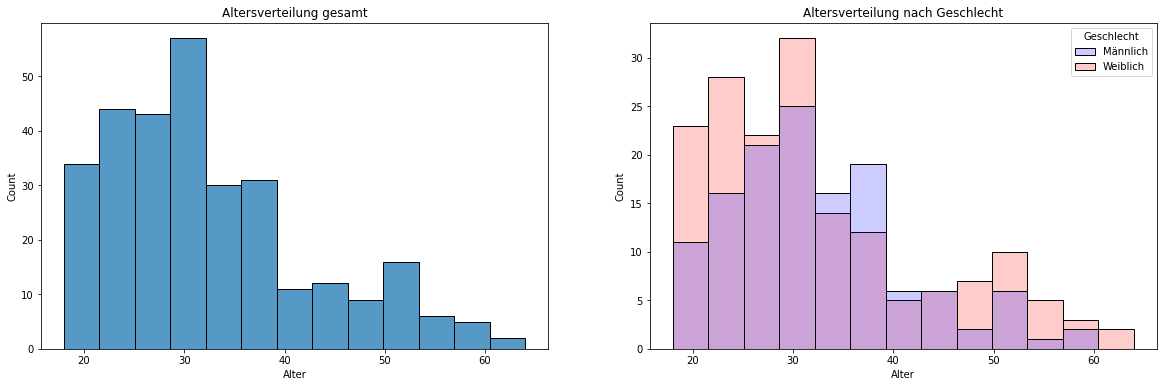

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=epoc, 
             x='Alter', 
             ax=axes[0]).set_title("Altersverteilung gesamt")



sns.histplot(data=epoc, x='Alter', hue='Geschlecht', palette=['blue','red'], alpha=0.2, 
             ax=axes[1]).set_title("Altersverteilung nach Geschlecht")



plt.show()

In [49]:
epoc['SES_Bildung'].value_counts(dropna=False)

Abitur/EOS, Universität                              88
Abitur/EOS, kein Berufsabschluss, Lehre/Student      79
Realschule, Lehre/Student                            51
POS/10. Klasse, FHR, Lehre/Student                   42
derzeit Schüler, ohne Schul- oder Berufsabschluss    13
NaN                                                  12
Abitur/EOS, Fachhochschule                           11
Ohne Schulabschluss/Hauptschule, Lehre                8
Name: SES_Bildung, dtype: int64

In [50]:
epoc['Ethnisch'].value_counts(dropna=False)

Kaukasisch    279
Andere         11
NaN             9
Hispanisch      3
Asiatisch       2
Name: Ethnisch, dtype: int64

In [51]:
epoc['Gruppe_Neu'].value_counts(dropna=False)

HC           162
OCD_NoMed     85
OCD_Med       57
Name: Gruppe_Neu, dtype: int64

In [7]:
epoc['MedLetzte3Monate_Substanzklasse'].value_counts(dropna=False)

keineAngabe                                        239
SSRI                                                43
TrizyklischesAD                                      5
SSNRI                                                3
SSRI_sonstigeGegenKoerperlicheBeschwerden            2
SSRI_TrizyklischesAD                                 2
TrizyklischesAD_sonstigeKoerperlBeschw               1
SSNRI_trizyklischesAD_atypischesAntipsychotikum      1
SSRI_SSNRI                                           1
SSRI_tetrazyklischesAD                               1
TrizyklischesAD_TetrazyklischesAD                    1
SSNRI_sonstigeGegenKoerperlicheBeschwerden           1
TrizyklischesAD_SSRI                                 1
SSNRI_SSRI                                           1
FrueherAntidepressiva                                1
AntipsychotikaErsteGeneration_SSRI                   1
Name: MedLetzte3Monate_Substanzklasse, dtype: int64

In [52]:
epoc['Med_1Nie_2LetzteVierWochen_3Frueher'].value_counts(dropna=False)

NaN                                      163
LetzteVierWochenMedikamente               61
KeineNieMedikamente                       52
FrueherAlsLetzteVierWochenMedikamente     28
Name: Med_1Nie_2LetzteVierWochen_3Frueher, dtype: int64

In [8]:
epoc['Ausschluss'].value_counts(dropna=False)

Kein Ausschluss    282
Ausschluss          22
Name: Ausschluss, dtype: int64

In [54]:
epoc['Ausschluss_Grund'].value_counts(dropna=False)

Kein Ausschluss    282
Studienabbruch      11
Diagnose             7
Auffälligkeiten      3
Terminabsagen        1
Name: Ausschluss_Grund, dtype: int64

In [55]:
epoc['Finish_vsQuit'].value_counts(dropna=False)

NaN                       166
reguläres Therapieende     96
Therapieabbruch            27
Probatorik                 10
Diagnostik                  5
Name: Finish_vsQuit, dtype: int64

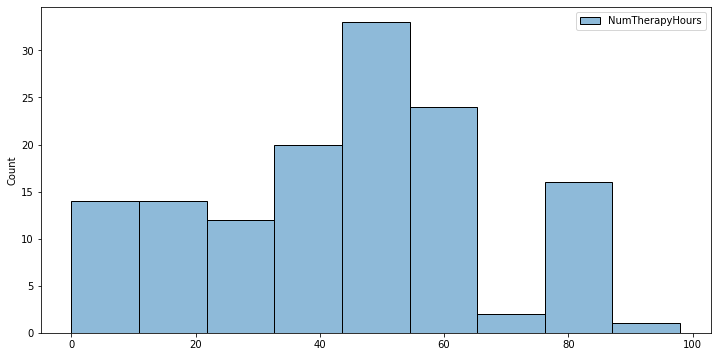

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.histplot(data=epoc[['NumTherapyHours']],
             ax=ax)

plt.show()

In [22]:
# Are excluded subjects only patients or both patients and controls?
print(epoc[epoc['Ausschluss'] == 'Ausschluss']['StatusOCD_binary'])

51     1.0
54     1.0
127    1.0
129    1.0
131    1.0
133    1.0
137    1.0
141    1.0
162    0.0
272    0.0
273    0.0
274    0.0
275    0.0
276    0.0
277    0.0
278    0.0
279    0.0
280    0.0
281    0.0
282    0.0
283    0.0
284    0.0
Name: StatusOCD_binary, dtype: float64


In [19]:
for i in [51, 54, 127, 129, 131, 133, 137, 141]:
    print(epoc.iloc[i, 13])

Studienabbruch
Studienabbruch
Studienabbruch
Studienabbruch
Studienabbruch
Studienabbruch
Auffälligkeiten
Studienabbruch


Excluded subjects are not exclusively patients, but patients and controls.

In [23]:
# Did all patients who quit therapy get excluded from the study?
print(epoc[epoc['Finish_vsQuit'] == 'Therapieabbruch']['Ausschluss'])

3      Kein Ausschluss
5      Kein Ausschluss
10     Kein Ausschluss
14     Kein Ausschluss
15     Kein Ausschluss
25     Kein Ausschluss
31     Kein Ausschluss
35     Kein Ausschluss
36     Kein Ausschluss
39     Kein Ausschluss
43     Kein Ausschluss
44     Kein Ausschluss
54          Ausschluss
60     Kein Ausschluss
62     Kein Ausschluss
63     Kein Ausschluss
68     Kein Ausschluss
73     Kein Ausschluss
81     Kein Ausschluss
84     Kein Ausschluss
88     Kein Ausschluss
90     Kein Ausschluss
108    Kein Ausschluss
114    Kein Ausschluss
119    Kein Ausschluss
134    Kein Ausschluss
135    Kein Ausschluss
Name: Ausschluss, dtype: category
Categories (2, object): ['Ausschluss', 'Kein Ausschluss']


Most patients who quit therapy did not get excluded from the study.

In [24]:
# Are all patients that are currently taking medicine listed as having taken medicine in the past 4 weeks?
print(epoc[epoc['Gruppe_Neu'] == 'OCD_Med']['Med_1Nie_2LetzteVierWochen_3Frueher'])

0     LetzteVierWochenMedikamente
1     LetzteVierWochenMedikamente
2     LetzteVierWochenMedikamente
3     LetzteVierWochenMedikamente
4     LetzteVierWochenMedikamente
5     LetzteVierWochenMedikamente
6     LetzteVierWochenMedikamente
7     LetzteVierWochenMedikamente
8     LetzteVierWochenMedikamente
9     LetzteVierWochenMedikamente
10    LetzteVierWochenMedikamente
11    LetzteVierWochenMedikamente
12    LetzteVierWochenMedikamente
13    LetzteVierWochenMedikamente
14    LetzteVierWochenMedikamente
15    LetzteVierWochenMedikamente
16    LetzteVierWochenMedikamente
17    LetzteVierWochenMedikamente
18    LetzteVierWochenMedikamente
19    LetzteVierWochenMedikamente
20    LetzteVierWochenMedikamente
21    LetzteVierWochenMedikamente
22    LetzteVierWochenMedikamente
23    LetzteVierWochenMedikamente
24    LetzteVierWochenMedikamente
25    LetzteVierWochenMedikamente
26    LetzteVierWochenMedikamente
27    LetzteVierWochenMedikamente
28    LetzteVierWochenMedikamente
29    LetzteVi

The coding is consistent, all subjects who are listed as taking medicine are also listed as having taken medicine in the past 4 weeks.

In [25]:
# Are all patients who took medicine in the past 4 weeks listed as currently taking medicine?
print(epoc[epoc['Med_1Nie_2LetzteVierWochen_3Frueher'] == 'LetzteVierWochenMedikamente']['Gruppe_Neu'])

0        OCD_Med
1        OCD_Med
2        OCD_Med
3        OCD_Med
4        OCD_Med
         ...    
56       OCD_Med
110    OCD_NoMed
111    OCD_NoMed
128    OCD_NoMed
135    OCD_NoMed
Name: Gruppe_Neu, Length: 61, dtype: category
Categories (3, object): ['HC', 'OCD_Med', 'OCD_NoMed']


Not all patients who have taken medicine in the past 4 weeks are coded as currently taking medicine. This is reasonable, since they may have discontinued medication in the past weeks.

### Delete subjects excluded from study

In [8]:
print(epoc.shape)

(304, 342)


In [9]:
target_to_list = ['Kein Ausschluss']

epoc = epoc[epoc['Ausschluss'].isin(target_to_list)]
print(epoc.shape)

(282, 342)


### Compare patient labels by Christian and Julia

Julia's labels

In [10]:
pat_labels_julia = epoc['Code'].unique()
pat_labels_julia.sort()
pat_labels_julia

array(['epoc_c_1001', 'epoc_c_1002', 'epoc_c_1003', 'epoc_c_1005',
       'epoc_c_1006', 'epoc_c_1008', 'epoc_c_1009', 'epoc_c_1010',
       'epoc_c_1011', 'epoc_c_1012', 'epoc_c_1013', 'epoc_c_1014',
       'epoc_c_1015', 'epoc_c_1016', 'epoc_c_1017', 'epoc_c_1018',
       'epoc_c_1020', 'epoc_c_1021', 'epoc_c_1022', 'epoc_c_1023',
       'epoc_c_1024', 'epoc_c_1026', 'epoc_c_1027', 'epoc_c_1028',
       'epoc_c_1029', 'epoc_c_1030', 'epoc_c_1031', 'epoc_c_1032',
       'epoc_c_1033', 'epoc_c_1034', 'epoc_c_1035', 'epoc_c_1037',
       'epoc_c_1038', 'epoc_c_1039', 'epoc_c_1040', 'epoc_c_1041',
       'epoc_c_1044', 'epoc_c_1045', 'epoc_c_1046', 'epoc_c_1047',
       'epoc_c_1048', 'epoc_c_1051', 'epoc_c_1053', 'epoc_c_1054',
       'epoc_c_1055', 'epoc_c_1056', 'epoc_c_1057', 'epoc_c_1058',
       'epoc_c_1060', 'epoc_c_1061', 'epoc_c_1062', 'epoc_c_1063',
       'epoc_c_1064', 'epoc_c_1065', 'epoc_c_1066', 'epoc_c_1067',
       'epoc_c_1068', 'epoc_c_1069', 'epoc_c_1070', 'epoc_c_10

In [11]:
type(pat_labels_julia)

numpy.ndarray

In [12]:
pat_labels_julia = np.ndarray.tolist(pat_labels_julia)

In [13]:
type(pat_labels_julia)

list

In [14]:
len(pat_labels_julia)

282

Christian's labels

In [15]:

pat_labels_christian = os.listdir('%s/EPOC/EPOC_BIDS/EPOC_rawdata' % configs.PROJECT_ROOT)
pat_labels_christian.sort()
pat_labels_christian

['dataset_description.json',
 'sub-epocc1001',
 'sub-epocc1002',
 'sub-epocc1005',
 'sub-epocc1006',
 'sub-epocc1008',
 'sub-epocc1009',
 'sub-epocc1010',
 'sub-epocc1011',
 'sub-epocc1012',
 'sub-epocc1013',
 'sub-epocc1014',
 'sub-epocc1015',
 'sub-epocc1016',
 'sub-epocc1017',
 'sub-epocc1018',
 'sub-epocc1019',
 'sub-epocc1020',
 'sub-epocc1021',
 'sub-epocc1022',
 'sub-epocc1024',
 'sub-epocc1026',
 'sub-epocc1027',
 'sub-epocc1028',
 'sub-epocc1029',
 'sub-epocc1032',
 'sub-epocc1034',
 'sub-epocc1035',
 'sub-epocc1037',
 'sub-epocc1038',
 'sub-epocc1039',
 'sub-epocc1040',
 'sub-epocc1041',
 'sub-epocc1044',
 'sub-epocc1045',
 'sub-epocc1046',
 'sub-epocc1048',
 'sub-epocc1051',
 'sub-epocc1054',
 'sub-epocc1056',
 'sub-epocc1057',
 'sub-epocc1058',
 'sub-epocc1059',
 'sub-epocc1060',
 'sub-epocc1061',
 'sub-epocc1062',
 'sub-epocc1063',
 'sub-epocc1064',
 'sub-epocc1065',
 'sub-epocc1066',
 'sub-epocc1067',
 'sub-epocc1068',
 'sub-epocc1069',
 'sub-epocc1070',
 'sub-epocc1071',

In [16]:
pat_labels_christian.remove('dataset_description.json')
pat_labels_christian.remove('task-rest_bold.json')
pat_labels_christian

['sub-epocc1001',
 'sub-epocc1002',
 'sub-epocc1005',
 'sub-epocc1006',
 'sub-epocc1008',
 'sub-epocc1009',
 'sub-epocc1010',
 'sub-epocc1011',
 'sub-epocc1012',
 'sub-epocc1013',
 'sub-epocc1014',
 'sub-epocc1015',
 'sub-epocc1016',
 'sub-epocc1017',
 'sub-epocc1018',
 'sub-epocc1019',
 'sub-epocc1020',
 'sub-epocc1021',
 'sub-epocc1022',
 'sub-epocc1024',
 'sub-epocc1026',
 'sub-epocc1027',
 'sub-epocc1028',
 'sub-epocc1029',
 'sub-epocc1032',
 'sub-epocc1034',
 'sub-epocc1035',
 'sub-epocc1037',
 'sub-epocc1038',
 'sub-epocc1039',
 'sub-epocc1040',
 'sub-epocc1041',
 'sub-epocc1044',
 'sub-epocc1045',
 'sub-epocc1046',
 'sub-epocc1048',
 'sub-epocc1051',
 'sub-epocc1054',
 'sub-epocc1056',
 'sub-epocc1057',
 'sub-epocc1058',
 'sub-epocc1059',
 'sub-epocc1060',
 'sub-epocc1061',
 'sub-epocc1062',
 'sub-epocc1063',
 'sub-epocc1064',
 'sub-epocc1065',
 'sub-epocc1066',
 'sub-epocc1067',
 'sub-epocc1068',
 'sub-epocc1069',
 'sub-epocc1070',
 'sub-epocc1071',
 'sub-epocc1072',
 'sub-epoc

In [17]:
type(pat_labels_christian)

list

In [18]:
# edit patient labels Christian to same format as Julias
pat_labels_christian_new = []
for subj in pat_labels_christian:
    
    subj_new = subj[4:8] + '_' + subj[8] + '_' + subj[9:None]
    pat_labels_christian_new.append(subj_new)

In [19]:
pat_labels_christian_new

['epoc_c_1001',
 'epoc_c_1002',
 'epoc_c_1005',
 'epoc_c_1006',
 'epoc_c_1008',
 'epoc_c_1009',
 'epoc_c_1010',
 'epoc_c_1011',
 'epoc_c_1012',
 'epoc_c_1013',
 'epoc_c_1014',
 'epoc_c_1015',
 'epoc_c_1016',
 'epoc_c_1017',
 'epoc_c_1018',
 'epoc_c_1019',
 'epoc_c_1020',
 'epoc_c_1021',
 'epoc_c_1022',
 'epoc_c_1024',
 'epoc_c_1026',
 'epoc_c_1027',
 'epoc_c_1028',
 'epoc_c_1029',
 'epoc_c_1032',
 'epoc_c_1034',
 'epoc_c_1035',
 'epoc_c_1037',
 'epoc_c_1038',
 'epoc_c_1039',
 'epoc_c_1040',
 'epoc_c_1041',
 'epoc_c_1044',
 'epoc_c_1045',
 'epoc_c_1046',
 'epoc_c_1048',
 'epoc_c_1051',
 'epoc_c_1054',
 'epoc_c_1056',
 'epoc_c_1057',
 'epoc_c_1058',
 'epoc_c_1059',
 'epoc_c_1060',
 'epoc_c_1061',
 'epoc_c_1062',
 'epoc_c_1063',
 'epoc_c_1064',
 'epoc_c_1065',
 'epoc_c_1066',
 'epoc_c_1067',
 'epoc_c_1068',
 'epoc_c_1069',
 'epoc_c_1070',
 'epoc_c_1071',
 'epoc_c_1072',
 'epoc_c_1073',
 'epoc_c_1074',
 'epoc_c_1075',
 'epoc_c_1076',
 'epoc_c_1077',
 'epoc_c_1078',
 'epoc_c_1080',
 'epoc_c

In [20]:
## delete relatives names and duplicate subject
#index_rel = pat_labels_christian_new.index('epoc_r_1001')
#print(index_rel)

#del pat_labels_christian_new[index_rel : None]

In [21]:
len(pat_labels_christian_new)

232

In [22]:
#pat_labels_christian_new.remove('epoc_c_1077a')
#len(pat_labels_christian_new)

In [253]:
for subj in pat_labels_christian_new:
  print(subj)

epoc_c_1001
epoc_c_1002
epoc_c_1005
epoc_c_1006
epoc_c_1008
epoc_c_1009
epoc_c_1010
epoc_c_1011
epoc_c_1012
epoc_c_1013
epoc_c_1014
epoc_c_1015
epoc_c_1016
epoc_c_1017
epoc_c_1018
epoc_c_1019
epoc_c_1020
epoc_c_1021
epoc_c_1022
epoc_c_1024
epoc_c_1026
epoc_c_1027
epoc_c_1028
epoc_c_1029
epoc_c_1032
epoc_c_1034
epoc_c_1035
epoc_c_1037
epoc_c_1038
epoc_c_1039
epoc_c_1040
epoc_c_1041
epoc_c_1044
epoc_c_1045
epoc_c_1046
epoc_c_1048
epoc_c_1051
epoc_c_1054
epoc_c_1056
epoc_c_1057
epoc_c_1058
epoc_c_1059
epoc_c_1060
epoc_c_1061
epoc_c_1062
epoc_c_1063
epoc_c_1064
epoc_c_1065
epoc_c_1066
epoc_c_1067
epoc_c_1068
epoc_c_1069
epoc_c_1070
epoc_c_1071
epoc_c_1072
epoc_c_1073
epoc_c_1074
epoc_c_1075
epoc_c_1076
epoc_c_1077
epoc_c_1078
epoc_c_1080
epoc_c_1082
epoc_c_1083
epoc_c_1084
epoc_c_1085
epoc_c_1086
epoc_c_1087
epoc_c_1088
epoc_c_1089
epoc_c_1090
epoc_c_1092
epoc_c_1093
epoc_c_1094
epoc_c_1095
epoc_c_1096
epoc_c_1097
epoc_c_1098
epoc_c_1100
epoc_c_1101
epoc_c_1102
epoc_c_1105
epoc_c_1106
epoc

In [256]:
for subj in pat_labels_julia:
  print(subj)

epoc_c_1001
epoc_c_1002
epoc_c_1003
epoc_c_1005
epoc_c_1006
epoc_c_1008
epoc_c_1009
epoc_c_1010
epoc_c_1011
epoc_c_1012
epoc_c_1013
epoc_c_1014
epoc_c_1015
epoc_c_1016
epoc_c_1017
epoc_c_1018
epoc_c_1020
epoc_c_1021
epoc_c_1022
epoc_c_1023
epoc_c_1024
epoc_c_1026
epoc_c_1027
epoc_c_1028
epoc_c_1029
epoc_c_1030
epoc_c_1031
epoc_c_1032
epoc_c_1033
epoc_c_1034
epoc_c_1035
epoc_c_1037
epoc_c_1038
epoc_c_1039
epoc_c_1040
epoc_c_1041
epoc_c_1044
epoc_c_1045
epoc_c_1046
epoc_c_1047
epoc_c_1048
epoc_c_1051
epoc_c_1053
epoc_c_1054
epoc_c_1055
epoc_c_1056
epoc_c_1057
epoc_c_1058
epoc_c_1060
epoc_c_1061
epoc_c_1062
epoc_c_1063
epoc_c_1064
epoc_c_1065
epoc_c_1066
epoc_c_1067
epoc_c_1068
epoc_c_1069
epoc_c_1070
epoc_c_1071
epoc_c_1072
epoc_c_1073
epoc_c_1074
epoc_c_1075
epoc_c_1076
epoc_c_1077
epoc_c_1078
epoc_c_1079
epoc_c_1080
epoc_c_1082
epoc_c_1083
epoc_c_1084
epoc_c_1085
epoc_c_1086
epoc_c_1087
epoc_c_1088
epoc_c_1089
epoc_c_1090
epoc_c_1091
epoc_c_1092
epoc_c_1093
epoc_c_1094
epoc_c_1095
epoc

Are Christian's labels a subset of Julia's labels?

In [257]:
set(pat_labels_christian_new) <= set(pat_labels_julia)

False

### Are there differences between patients and healthy controls?

#### Add a variable for subject counts

In [20]:
listofones = [1] * epoc.shape[0]
epoc['Anzahl'] = listofones

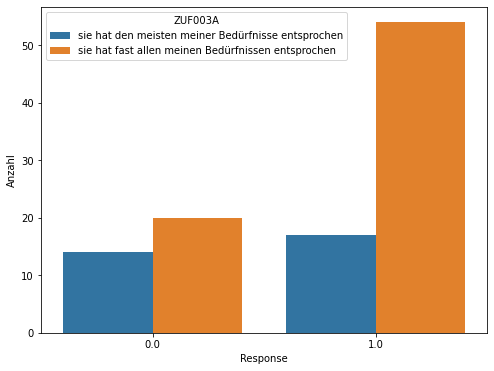

In [26]:
ZUF5 = epoc[['ZUF003A','Response', 'Anzahl']].groupby(['ZUF003A','Response']).sum()
df_ZUF5 = ZUF5.reset_index()
df_ZUF5




# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_ZUF5,
            y='Anzahl',
            x='Response',
            hue='ZUF003A',
            estimator=sum, 
            ci=False, 
            ax=ax)

plt.show()

#### Sex distribution across patients and controls

In [69]:
subjects_sex = epoc[['StatusOCD_binary','Geschlecht', 'Anzahl']].groupby(['StatusOCD_binary','Geschlecht']).sum()

In [70]:
df_sex = subjects_sex.reset_index()

In [71]:
df_sex

,StatusOCD_binary,Geschlecht,Anzahl
0,0.0,Männlich,62
1,0.0,Weiblich,86
2,1.0,Männlich,65
3,1.0,Weiblich,69


In [72]:
type(df_sex)

pandas.core.frame.DataFrame

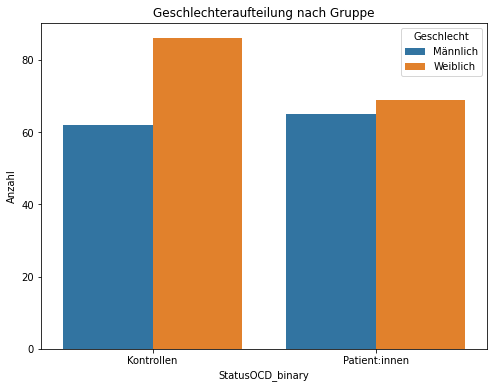

In [73]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_sex,
            y='Anzahl',
            x='StatusOCD_binary',
            hue='Geschlecht',
            estimator=sum, 
            ci=False, 
            ax=ax)

ax.set_title('Geschlechteraufteilung nach Gruppe')
ax.set_ylabel('Anzahl')
ax.set_xticklabels(['Kontrollen', 'Patient:innen'])
plt.show()

#### SES education across patients and controls

In [74]:
subjects_ses = epoc[['StatusOCD_binary','SES_Bildung', 'Anzahl']].groupby(['StatusOCD_binary','SES_Bildung']).sum()
df_ses = subjects_ses.reset_index()
df_ses

,StatusOCD_binary,SES_Bildung,Anzahl
0,0.0,"Abitur/EOS, Fachhochschule",5
1,0.0,"Abitur/EOS, Universität",46
2,0.0,"Abitur/EOS, kein Berufsabschluss, Lehre/Student",47
3,0.0,"Ohne Schulabschluss/Hauptschule, Lehre",5
4,0.0,"POS/10. Klasse, FHR, Lehre/Student",22
5,0.0,"Realschule, Lehre/Student",20
6,0.0,"derzeit Schüler, ohne Schul- oder Berufsabschluss",3
7,1.0,"Abitur/EOS, Fachhochschule",5
8,1.0,"Abitur/EOS, Universität",39
9,1.0,"Abitur/EOS, kein Berufsabschluss, Lehre/Student",27


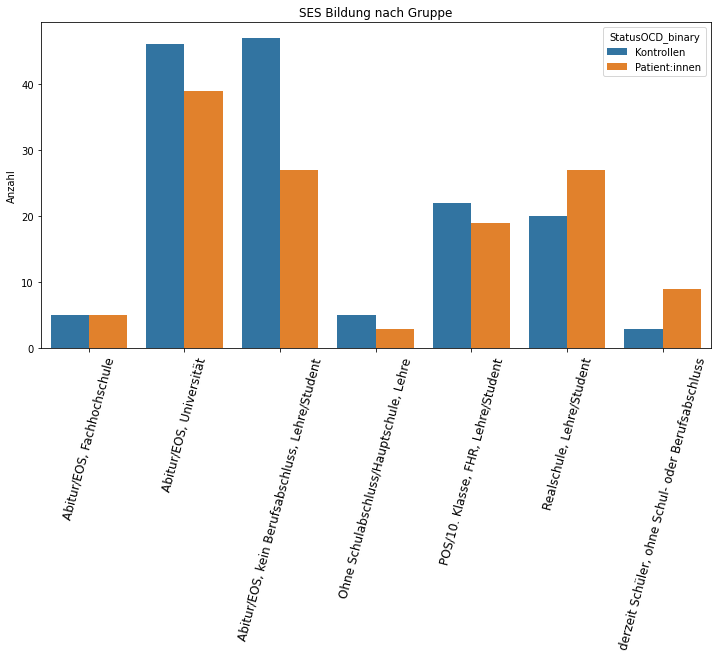

In [75]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(12,6))
g = sns.barplot(data=df_ses,
            y='Anzahl',
            x='SES_Bildung',
            hue='StatusOCD_binary',
            estimator=sum, 
            ci=False, 
            ax=ax)

ax.set_title('SES Bildung nach Gruppe')
ax.set_ylabel('Anzahl')
ax.set_xlabel('')


ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
#ax.set_xticklabels(['11', '22', '33', '44', '55', '66', '77'])


leg = g.axes.get_legend()

new_labels = ['Kontrollen', 'Patient:innen']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

#### Age distribution across patients and controls

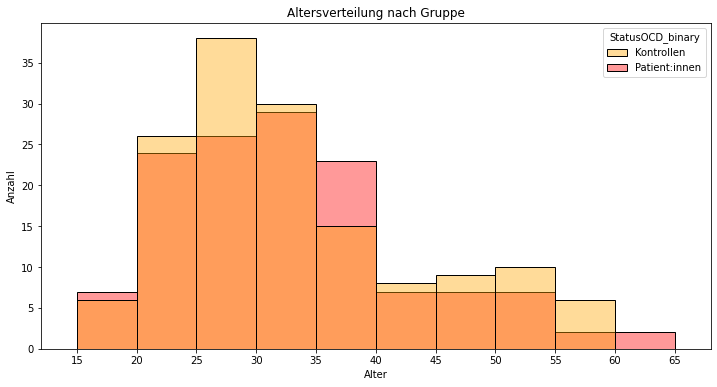

In [37]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==0], color = 'orange', alpha=0.4, ax=ax, binwidth=5)
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==1], color = 'red', alpha=0.4, ax=ax,  binwidth=5)

g = sns.histplot(data=epoc, 
        x='Alter', 
        hue='StatusOCD_binary',
        binrange=(15,70), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=5, 
        palette=['orange', 'red'])


ax.set_xlim(12,68)
ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('Alter')
ax.set_ylabel('Anzahl')
ax.set_title('Altersverteilung nach Gruppe')

leg = g.axes.get_legend()

new_labels = ['Kontrollen', 'Patient:innen']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

In [38]:
#subjects_age = epoc[['StatusOCD_binary','Alter', 'Anzahl']].groupby(['StatusOCD_binary','Alter']).sum()
#df_age = subjects_age.reset_index()
#df_age

### Are response/ remission and response-only coded consistently?

In [76]:
vars_reac = epoc[['Response','Response_only', 'Remission', 'Anzahl']].groupby(['Response', 'Response_only', 'Remission']).sum()
df_reac = vars_reac.reset_index()
df_reac

,Response,Response_only,Remission,Anzahl
0,0.0,0.0,0.0,40
1,0.0,0.0,1.0,7
2,1.0,0.0,1.0,53
3,1.0,1.0,0.0,19


In [77]:
# create additional variables from response/remission combinations
rr_binary = [1,2,3,4]
anzahl_sum = [df_reac.iloc[0,3]+df_reac.iloc[1,3]+df_reac.iloc[2,3]+df_reac.iloc[3,3], df_reac.iloc[1,3]+df_reac.iloc[2,3]+df_reac.iloc[3,3], df_reac.iloc[2,3]+df_reac.iloc[3,3], df_reac.iloc[2,3]]
list_rr = ['no_change', 'rem_only', 'res_only', 'rem_and_res']

df_reac['code_rr'] = rr_binary
df_reac['anzahl_sum'] = anzahl_sum
df_reac['list_rr'] = list_rr


df_reac

,Response,Response_only,Remission,Anzahl,code_rr,anzahl_sum,list_rr
0,0.0,0.0,0.0,40,1,119,no_change
1,0.0,0.0,1.0,7,2,79,rem_only
2,1.0,0.0,1.0,53,3,72,res_only
3,1.0,1.0,0.0,19,4,53,rem_and_res


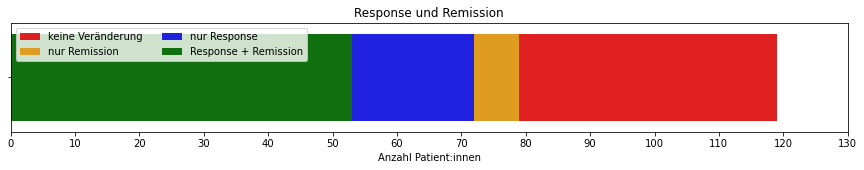

In [78]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(15,2))
sns.barplot(data=df_reac[df_reac["list_rr"]=='no_change'], 
            y='list_rr', x='anzahl_sum', ax=ax, color='red', orient='h', label='keine Veränderung')

sns.barplot(data=df_reac[df_reac["list_rr"]=='rem_only'], 
            y='list_rr', x='anzahl_sum', ax=ax, color='orange', label='nur Remission')

sns.barplot(data=df_reac[df_reac["list_rr"]=='res_only'], 
            y='list_rr', x='anzahl_sum', color='blue', label='nur Response')

sns.barplot(data=df_reac[df_reac["list_rr"]=='rem_and_res'], 
            y='list_rr', x='anzahl_sum', color='green', ax=ax, label='Response + Remission')

ax.set_title('Response und Remission')
ax.set_xlabel('Anzahl Patient:innen')
ax.set_xticks(np.arange(0, 140, step=10)) 
ax.set_yticklabels('')
ax.set_ylabel('')
ax.legend(ncol=2, loc="upper left", frameon=True)

#ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
#ax.set_xticklabels(['no_change', 'rem_only', 'rem_and_res', 'res_only'])

plt.show()

/home/marijatochadse/2_scripts/EPOC_overview:1: parser error : Document is empty

^
Shortcut::read: could not parse file: /home/marijatochadse/2_scripts/EPOC_overview

** (org.inkscape.Inkscape:79047): WARNING **: 15:43:57.404: Can't open file: /home/marijatochadse/Documents/my_presentations/poster_figs/res_rem.emf (doesn't exist)
ink_file_open: '/home/marijatochadse/Documents/my_presentations/poster_figs/res_rem.emf' cannot be opened!
InkscapeApplication::document_open: Failed to open: /home/marijatochadse/Documents/my_presentations/poster_figs/res_rem.emf
ConcreteInkscapeApplication::on_open: failed to create document!


0

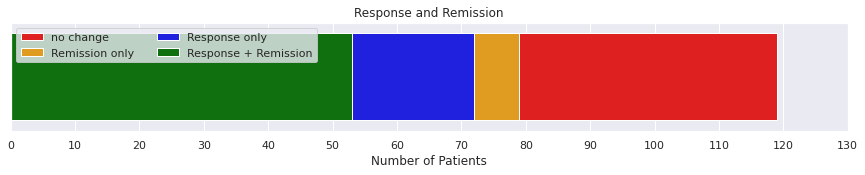

In [85]:
# Bar plot with counts
sns.set(font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(15,2))
sns.barplot(data=df_reac[df_reac["list_rr"]=='no_change'], 
            y='list_rr', x='anzahl_sum', ax=ax, color='red', orient='h', label='no change')

sns.barplot(data=df_reac[df_reac["list_rr"]=='rem_only'], 
            y='list_rr', x='anzahl_sum', ax=ax, color='orange', label='Remission only')

sns.barplot(data=df_reac[df_reac["list_rr"]=='res_only'], 
            y='list_rr', x='anzahl_sum', color='blue', label='Response only')

sns.barplot(data=df_reac[df_reac["list_rr"]=='rem_and_res'], 
            y='list_rr', x='anzahl_sum', color='green', ax=ax, label='Response + Remission')

ax.set_title('Response and Remission')
ax.set_xlabel('Number of Patients')
ax.set_xticks(np.arange(0, 140, step=10)) 
ax.set_yticklabels('')
ax.set_ylabel('')
ax.legend(ncol=2, loc="upper left", frameon=True)

#ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
#ax.set_xticklabels(['no_change', 'rem_only', 'rem_and_res', 'res_only'])

#plt.show()


plt.savefig('%s/my_presentations/poster_figs/res_rem.svg' % configs.OUTPUT_ROOT, format='svg', bbox_inches='tight')
subprocess.call('inkscape /home/marijatochadse/Documents/my_presentations/poster_figs/res_rem.svg /home/marijatochadse/Documents/my_presentations/poster_figs/res_rem.emf',shell=True)

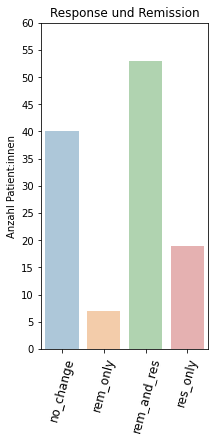

In [42]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(3,6))
g=sns.barplot(data=df_reac, x='code_rr', y='Anzahl', alpha=0.4, ax=ax)


ax.set_title('Response und Remission')
ax.set_ylabel('Anzahl Patient:innen')

ax.set_yticks(np.arange(0, 65, step=5))
ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
ax.set_xticklabels(['no_change', 'rem_only', 'rem_and_res', 'res_only'])
ax.set_xlabel('')
plt.show()

### Are there differences between responders and non-responders?

#### Sex distribution across responders and non-responders

In [21]:
nresponse_F32 = epoc[['Response','F32F33', 'Anzahl']].groupby(['Response','F32F33']).sum()
df_resp_F32 = nresponse_F32.reset_index()
df_resp_F32

,Response,F32F33,Anzahl
0,0.0,F32 und/oder F33 Diagnose,28
1,0.0,keine F32/F33 Diagnose,22
2,1.0,F32 und/oder F33 Diagnose,43
3,1.0,keine F32/F33 Diagnose,32


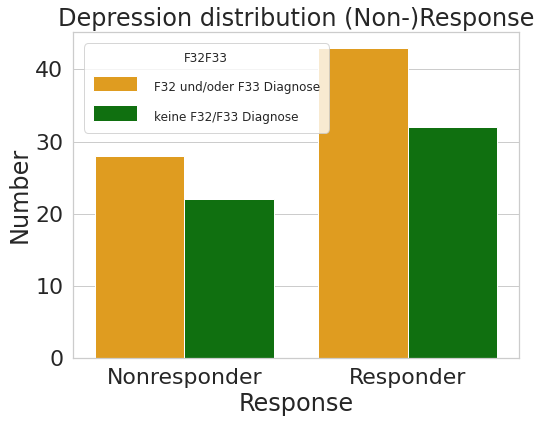

In [25]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_resp_F32,
            y='Anzahl',
            x='Response',
            hue='F32F33',
            palette=['orange', 'green'],
            ax=ax)

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
ax.set_title('Depression distribution (Non-)Response')
ax.set_ylabel('Number')
ax.set_xticklabels(['Nonresponder', 'Responder'])
plt.show()


In [27]:
nrem_F32 = epoc[['Remission','F32F33', 'Anzahl']].groupby(['Remission','F32F33']).sum()
df_rem_F32 = nrem_F32.reset_index()
df_rem_F32

,Remission,F32F33,Anzahl
0,0.0,F32 und/oder F33 Diagnose,40
1,0.0,keine F32/F33 Diagnose,23
2,1.0,F32 und/oder F33 Diagnose,31
3,1.0,keine F32/F33 Diagnose,31


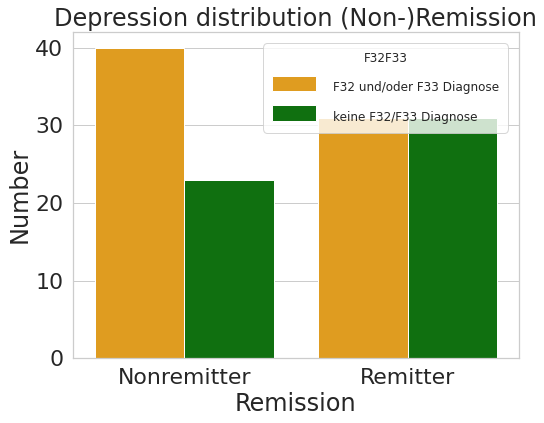

In [28]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_rem_F32,
            y='Anzahl',
            x='Remission',
            hue='F32F33',
            palette=['orange', 'green'],
            ax=ax)

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
ax.set_title('Depression distribution (Non-)Remission')
ax.set_ylabel('Number')
ax.set_xticklabels(['Nonremitter', 'Remitter'])
plt.show()


In [80]:
nresponse_sex = epoc[['Response','Geschlecht', 'Anzahl']].groupby(['Response','Geschlecht']).sum()
df_resp_sex = nresponse_sex.reset_index()
df_resp_sex

,Response,Geschlecht,Anzahl
0,0.0,Männlich,18
1,0.0,Weiblich,29
2,1.0,Männlich,39
3,1.0,Weiblich,33


In [1]:
sexlab = ['Male', 'Female']

sns.set(font_scale=2)
sns.set_style("whitegrid")

# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_resp_sex,
            y='Anzahl',
            x='Response',
            hue='Geschlecht',
            palette=['orange', 'purple'],
            ax=ax)

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
ax.set_title('Sex distribution (Non-)Response')
ax.set_ylabel('Number')
ax.set_xticklabels(['Nonresponder', 'Responder'])
#plt.show()

legend = plt.legend(title="Sex",
                    loc=4, fontsize='small', fancybox=True)

#legend = plt.legend(title="Sex", loc="lower right")


for i, text in enumerate(legend.get_texts()):
    text.set_text(sexlab[i])





plt.savefig(f'{configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_response.svg', format='svg', bbox_inches='tight')
subprocess.call(f'inkscape {configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_response.svg {configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_response.emf',shell=True)

NameError: name 'sns' is not defined

In [45]:
nrem_sex = epoc[['Remission','Geschlecht', 'Anzahl']].groupby(['Remission','Geschlecht']).sum()
df_rem_sex = nrem_sex.reset_index()
df_rem_sex

,Remission,Geschlecht,Anzahl
0,0.0,Männlich,23
1,0.0,Weiblich,36
2,1.0,Männlich,34
3,1.0,Weiblich,26


/home/marijatochadse/2_scripts/EPOC_overview:1: parser error : Document is empty

^
Shortcut::read: could not parse file: /home/marijatochadse/2_scripts/EPOC_overview

** (org.inkscape.Inkscape:79275): WARNING **: 15:49:21.692: Can't open file: /home/marijatochadse/Documents/my_presentations/poster_figs/sex_rem.emf (doesn't exist)
ink_file_open: '/home/marijatochadse/Documents/my_presentations/poster_figs/sex_rem.emf' cannot be opened!
InkscapeApplication::document_open: Failed to open: /home/marijatochadse/Documents/my_presentations/poster_figs/sex_rem.emf
ConcreteInkscapeApplication::on_open: failed to create document!
/home/marijatochadse/Documents/my_presentations/slide_sample.pptx:1: parser error : Start tag expected, '<' not found
PK
^
/home/marijatochadse/Documents/my_presentations/slide_sample.pptx:1: parser error : Start tag expected, '<' not found
PK
^
ink_file_open: '/home/marijatochadse/Documents/my_presentations/slide_sample.pptx' cannot be opened!
InkscapeApplicatio

0

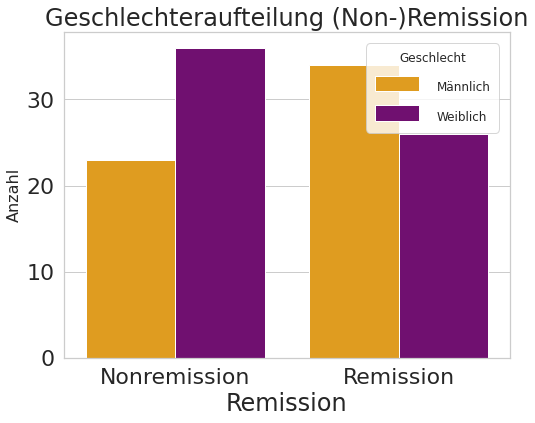

In [86]:
# Bar plot with counts
sns.set(font_scale=2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_rem_sex,
            y='Anzahl',
            x='Remission',
            hue='Geschlecht',
            palette=['orange', 'purple'],
            ax=ax)

ax.set_ylabel('Balanced Accuracy', fontsize=16)
ax.set_title('Geschlechteraufteilung (Non-)Remission')
ax.set_ylabel('Anzahl')
ax.set_xticklabels(['Nonremission', 'Remission'])
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')

#plt.show()
#fig.savefig('/home/marijatochadse/2_scripts/EPOC_MLresults/testfigeps.eps', format='eps')
#save_path = '/home/marijatochadse/2_scripts/EPOC_MLresults/testfig.pdf'
#plt.savefig(save_path, bbox_inches='tight')


plt.savefig(f'{configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_rem.svg', format='svg', bbox_inches='tight')
subprocess.call(f'inkscape {configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_rem.svg {configs.OUTPUT_ROOT}/my_presentations/poster_figs/sex_rem.emf',shell=True)

#### SES education across responders / non-responders

In [274]:
nresponse_ses = epoc[['Response','SES_Bildung', 'Anzahl']].groupby(['Response','SES_Bildung']).sum()
df_resp_ses = nresponse_ses.reset_index()
df_resp_ses

,Response,SES_Bildung,Anzahl
0,0.0,"Abitur/EOS, Fachhochschule",1
1,0.0,"Abitur/EOS, Universität",10
2,0.0,"Abitur/EOS, kein Berufsabschluss, Lehre/Student",10
3,0.0,"Ohne Schulabschluss/Hauptschule, Lehre",0
4,0.0,"POS/10. Klasse, FHR, Lehre/Student",7
5,0.0,"Realschule, Lehre/Student",9
6,0.0,"derzeit Schüler, ohne Schul- oder Berufsabschluss",6
7,1.0,"Abitur/EOS, Fachhochschule",3
8,1.0,"Abitur/EOS, Universität",25
9,1.0,"Abitur/EOS, kein Berufsabschluss, Lehre/Student",13


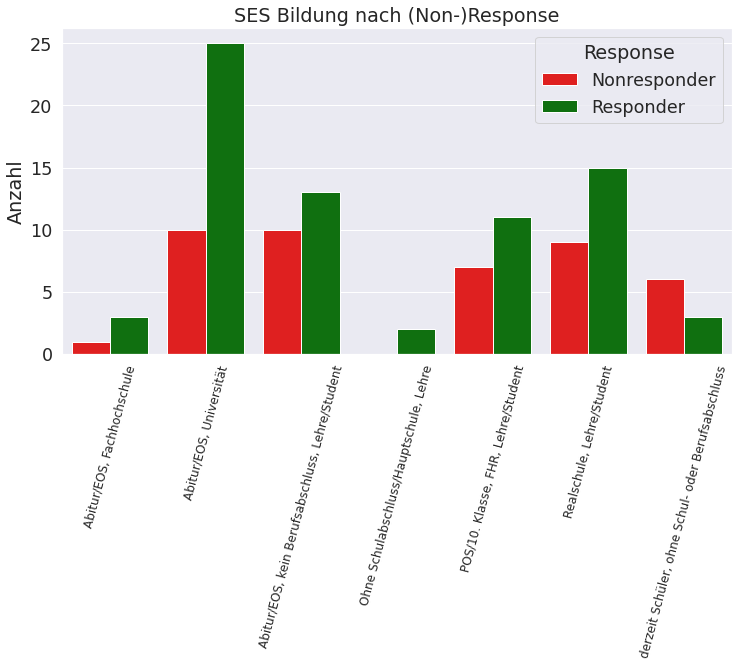

In [275]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(12,6))
g = sns.barplot(data=df_resp_ses,
            y='Anzahl',
            x='SES_Bildung',
            hue='Response',
            palette=['red', 'green'],
            ax=ax)

ax.set_title('SES Bildung nach (Non-)Response')
ax.set_ylabel('Anzahl')
ax.set_xlabel('')


ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
#ax.set_xticklabels(['11', '22', '33', '44', '55', '66', '77'])


leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

#### Age distribution across responders/ non-responders

In [122]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

/home/marijatochadse/2_scripts/EPOC_overview:1: parser error : Document is empty

^
Shortcut::read: could not parse file: /home/marijatochadse/2_scripts/EPOC_overview

** (org.inkscape.Inkscape:34578): WARNING **: 09:52:34.101: Can't open file: /home/marijatochadse/Documents/my_presentations/poster_figs/age_response.emf (doesn't exist)
ink_file_open: '/home/marijatochadse/Documents/my_presentations/poster_figs/age_response.emf' cannot be opened!
InkscapeApplication::document_open: Failed to open: /home/marijatochadse/Documents/my_presentations/poster_figs/age_response.emf
ConcreteInkscapeApplication::on_open: failed to create document!


0

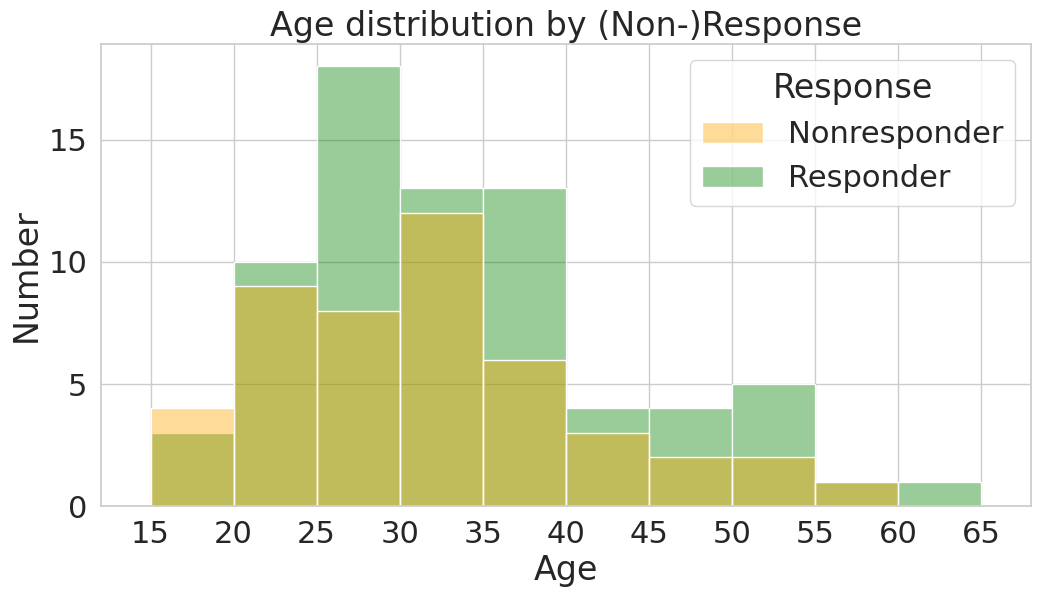

In [124]:
#sns.reset_orig()
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))

g = sns.histplot(data=epoc, 
        x='Alter', 
        hue='Response',
        binrange=(15,70), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=5, 
        palette=['orange', 'green'])


ax.set_xlim(12,68)
ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('Age')
ax.set_ylabel('Number')
ax.set_title('Age distribution by (Non-)Response')

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

#plt.show()


plt.savefig(f'{configs.OUTPUT_ROOT}/my_presentations/poster_figs/age_response.svg', format='svg', bbox_inches='tight')
subprocess.call(f'inkscape {configs.OUTPUT_ROOT}/my_presentations/poster_figs/age_response.svg {configs.OUTPUT_ROOT}/my_presentations/poster_figs/age_response.emf',shell=True)

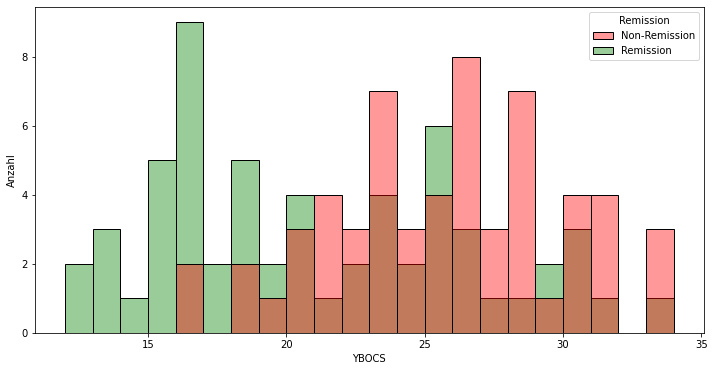

In [35]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==0], color = 'orange', alpha=0.4, ax=ax, binwidth=5)
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==1], color = 'red', alpha=0.4, ax=ax,  binwidth=5)

g = sns.histplot(data=epoc, 
        x='YBOO02T0', 
        hue='Remission',
        #binrange=(15,70), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=1, 
        palette=['red', 'green'])


#ax.set_xlim(10,40)
#ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('YBOCS')
ax.set_ylabel('Anzahl')
#ax.set_title('Altersverteilung nach Gruppe')

leg = g.axes.get_legend()

new_labels = ['Non-Remission', 'Remission']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()


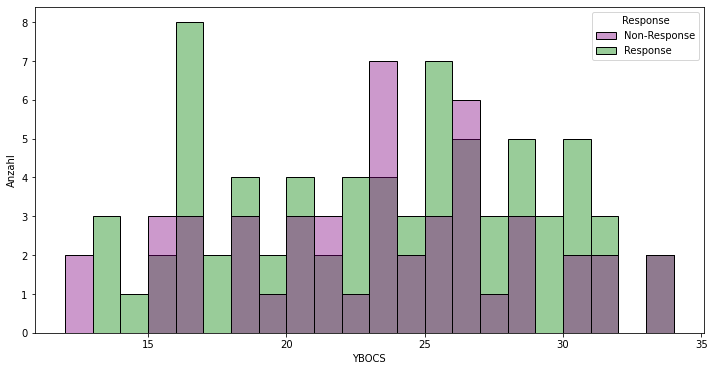

In [39]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==0], color = 'orange', alpha=0.4, ax=ax, binwidth=5)
#sns.histplot(x='Alter', binrange=(15,70), data=epoc[epoc["StatusOCD_binary"]==1], color = 'red', alpha=0.4, ax=ax,  binwidth=5)

g = sns.histplot(data=epoc, 
        x='YBOO02T0', 
        hue='Response',
        #binrange=(15,70), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=1, 
        palette=['purple', 'green'])


#ax.set_xlim(10,40)
#ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('YBOCS')
ax.set_ylabel('Anzahl')
#ax.set_title('Altersverteilung nach Gruppe')

leg = g.axes.get_legend()

new_labels = ['Non-Response', 'Response']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

#### Medication status across responders / non-responders

In [277]:
nresponse_med = epoc[['Response','Gruppe_Neu', 'Anzahl']].groupby(['Response','Gruppe_Neu']).sum()
df_resp_med = nresponse_med.reset_index()
df_resp_med

,Response,Gruppe_Neu,Anzahl
0,0.0,HC,0
1,0.0,OCD_Med,19
2,0.0,OCD_NoMed,28
3,1.0,HC,0
4,1.0,OCD_Med,33
5,1.0,OCD_NoMed,39


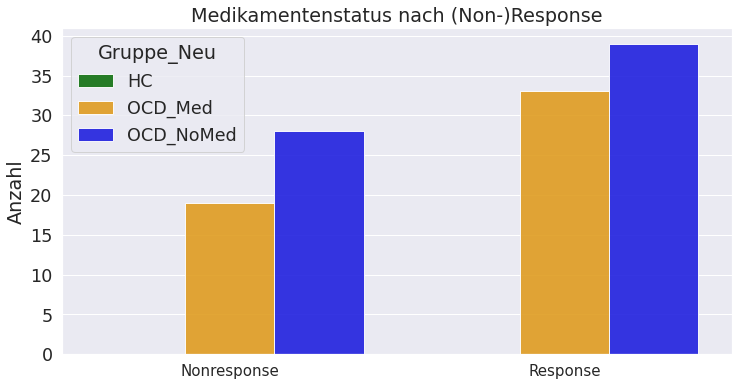

In [304]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(12,6))
g = sns.barplot(data=df_resp_med,
            y='Anzahl',
            x='Response',
            hue='Gruppe_Neu',
            palette=['green', 'orange', 'blue'],
            alpha=0.9,
            ax=ax)

ax.set_title('Medikamentenstatus nach (Non-)Response')
ax.set_ylabel('Anzahl')
ax.set_xlabel('')


ax.set_xticklabels(g.get_xticklabels(), fontsize=15)
#ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=15)
ax.set_xticklabels(['Nonresponse', 'Response'])


plt.show()

#### Finished/ quit therapy across responders / non-responders

In [279]:
nresponse_fin = epoc[['Response','Finish_vsQuit', 'Anzahl']].groupby(['Response','Finish_vsQuit']).sum()
df_resp_fin = nresponse_fin.reset_index()
df_resp_fin

,Response,Finish_vsQuit,Anzahl
0,0.0,Diagnostik,0
1,0.0,Probatorik,0
2,0.0,Therapieabbruch,18
3,0.0,reguläres Therapieende,27
4,1.0,Diagnostik,0
5,1.0,Probatorik,0
6,1.0,Therapieabbruch,8
7,1.0,reguläres Therapieende,64


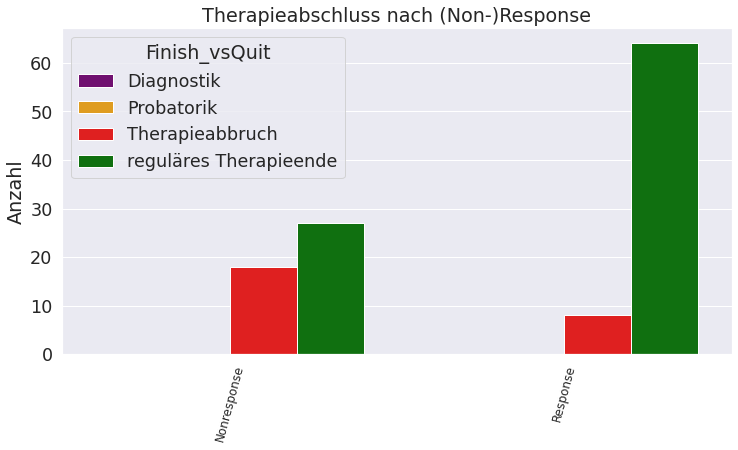

In [280]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(12,6))
g = sns.barplot(data=df_resp_fin,
            y='Anzahl',
            x='Response',
            hue='Finish_vsQuit',
            palette=['purple', 'orange', 'red', 'green'],
            ax=ax)

ax.set_title('Therapieabschluss nach (Non-)Response')
ax.set_ylabel('Anzahl')
ax.set_xlabel('')


ax.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=12)
ax.set_xticklabels(['Nonresponse', 'Response'])


plt.show()

#### Number of therapy hours across responders / non-responders

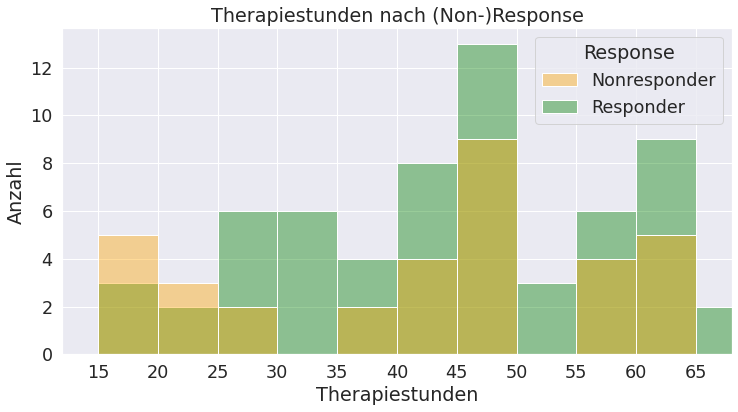

In [281]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))

g = sns.histplot(data=epoc, 
        x='NumTherapyHours', 
        hue='Response',
        binrange=(15,70), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=5, 
        palette=['orange', 'green'])


ax.set_xlim(12,68)
ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('Therapiestunden')
ax.set_ylabel('Anzahl')
ax.set_title('Therapiestunden nach (Non-)Response')

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

### Visualize clinical variables

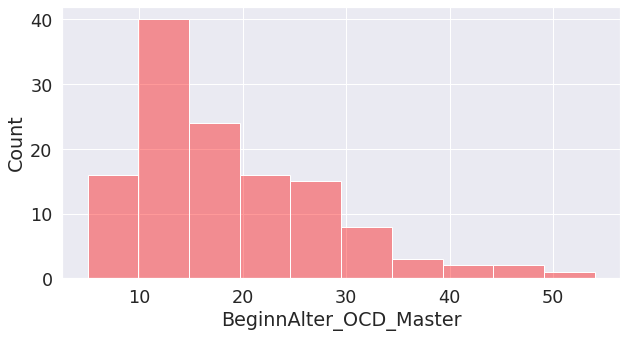

In [282]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(10,5))

g = sns.histplot(data=epoc, 
        x='BeginnAlter_OCD_Master', 
        color = 'red', 
        alpha=0.4, 
        ax=ax)

plt.show()


In [283]:
epoc['BeginnAlter_OCD_Master'].unique()

array([12., 26., 10., 13., 15., 29., 42.,  9., 19., 16., 22., 11.,  8.,
       20., nan,  6., 45., 31., 34., 24., 37., 21., 27., 17.,  7., 18.,
       30.,  5., 14., 23., 54., 25., 35., 40., 28.])

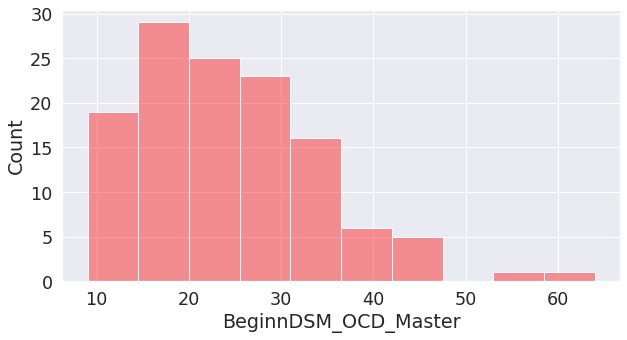

In [284]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(10,5))

g = sns.histplot(data=epoc, 
        x='BeginnDSM_OCD_Master', 
        color = 'red', 
        alpha=0.4, 
        ax=ax)

plt.show()

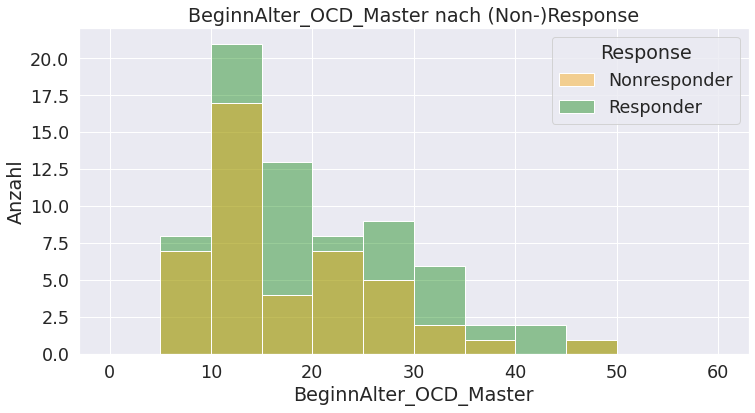

In [285]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))

g = sns.histplot(data=epoc, 
        x='BeginnAlter_OCD_Master', 
        hue='Response',
        binrange=(0,60), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=5, 
        palette=['orange', 'green'])


#ax.set_xlim(12,68)
#ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('BeginnAlter_OCD_Master')
ax.set_ylabel('Anzahl')
ax.set_title('BeginnAlter_OCD_Master nach (Non-)Response')

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

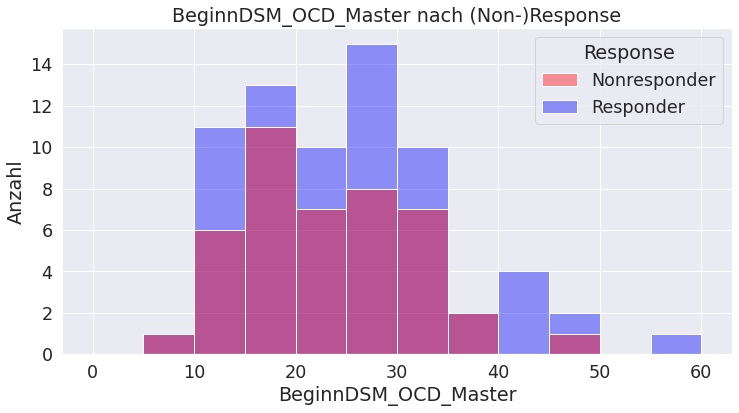

In [286]:
# Histogram
fig, ax = plt.subplots(1, 1, figsize=(12,6))

g = sns.histplot(data=epoc, 
        x='BeginnDSM_OCD_Master', 
        hue='Response',
        binrange=(0,60), 
        color = 'red', 
        alpha=0.4, 
        ax=ax,  
        binwidth=5, 
        palette=['red', 'blue'])


#ax.set_xlim(12,68)
#ax.set_xticks(np.arange(15, 70, step=5)) 
ax.set_xlabel('BeginnDSM_OCD_Master')
ax.set_ylabel('Anzahl')
ax.set_title('BeginnDSM_OCD_Master nach (Non-)Response')

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

plt.show()

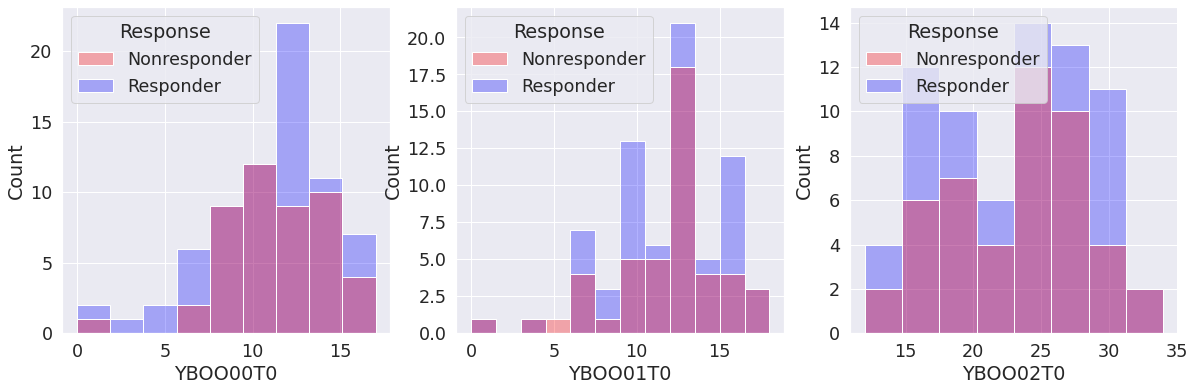

In [287]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))


g = sns.histplot(data=epoc, 
        x='YBOO00T0', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[0],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    

g =sns.histplot(data=epoc, 
        x='YBOO01T0',
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[1],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

g=sns.histplot(data=epoc, 
        x='YBOO02T0', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[2],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)


plt.show()

In [288]:
epoc.columns.get_loc("OCI_R")

54

In [289]:
 epoc.columns.get_loc("OCI_R_Summe_MentalesNeutralisieren")

61

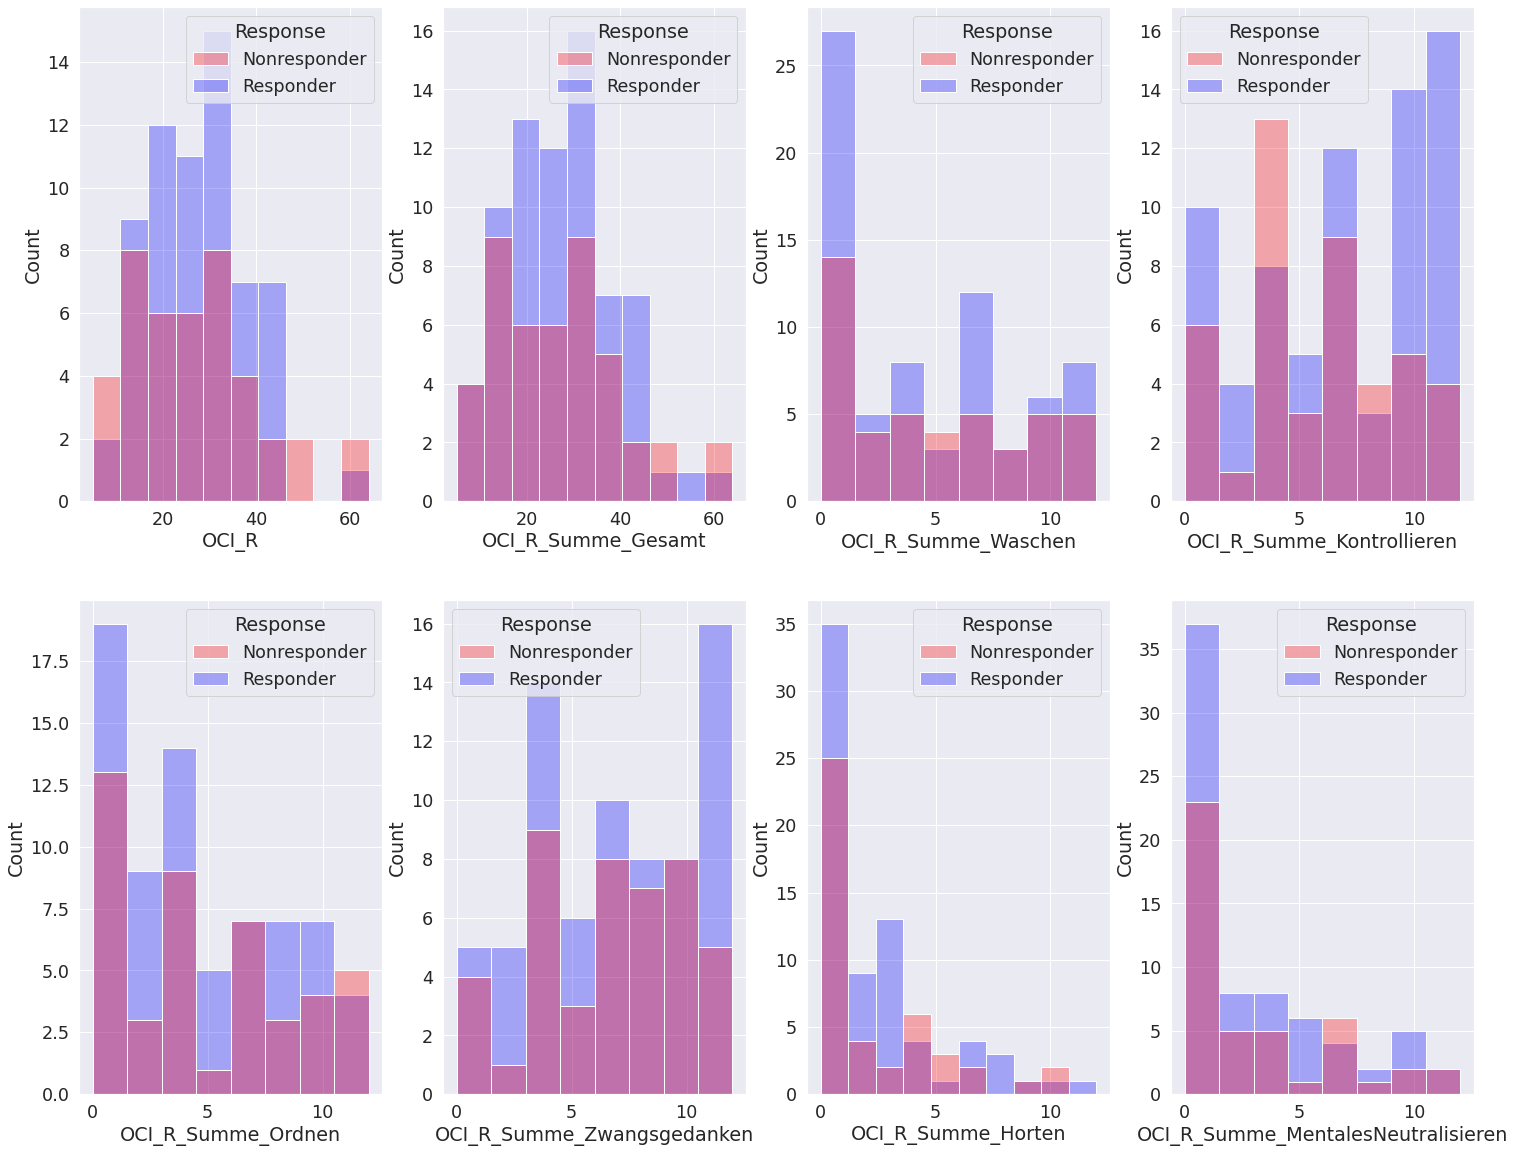

In [290]:
f, axes = plt.subplots(2, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1]

for clin in range(54,62):
    sns.set(font_scale=1.6)
    
    g=sns.histplot(data=epoc, 
        x=epoc.iloc[:,clin], 
        hue='Response',
        color = 'red', 
        alpha=0.3, 
        ax=axes[row[cnt], col[cnt]],
        palette=['red', 'blue'])
    
    leg = g.axes.get_legend()
    new_labels = ['Nonresponder', 'Responder']
    
    for t, l in zip(leg.texts, new_labels):
        t.set_text(l)
    
    cnt=cnt+1

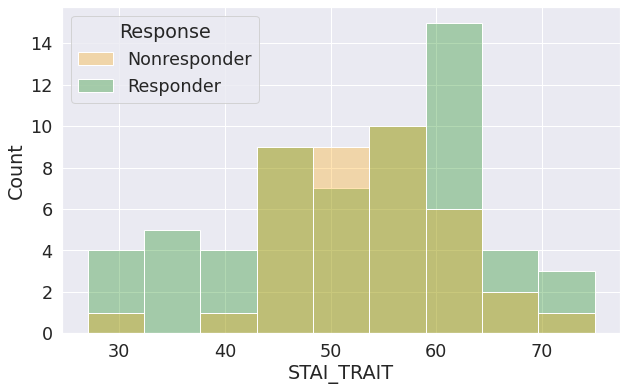

In [291]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))


g = sns.histplot(data=epoc, 
        x='STAI_TRAIT', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes,  
        #binwidth=5, 
        palette=['orange', 'green'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    

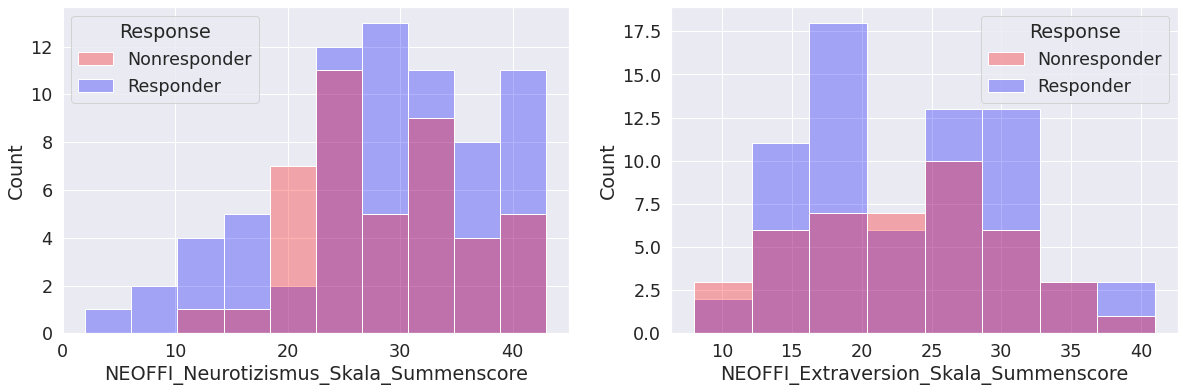

In [292]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


g = sns.histplot(data=epoc, 
        x='NEOFFI_Neurotizismus_Skala_Summenscore', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[0],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    

g =sns.histplot(data=epoc, 
        x='NEOFFI_Extraversion_Skala_Summenscore',
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[1],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

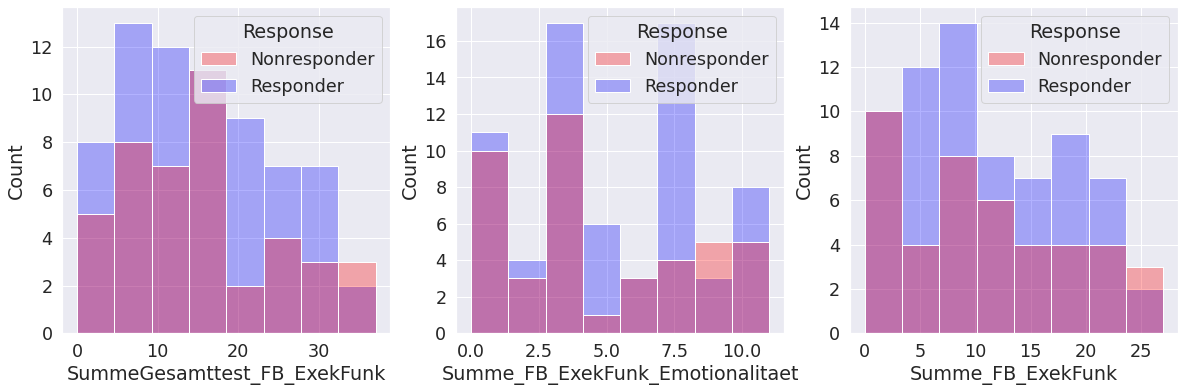

In [293]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))


g = sns.histplot(data=epoc, 
        x='SummeGesamttest_FB_ExekFunk', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[0],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    

g =sns.histplot(data=epoc, 
        x='Summe_FB_ExekFunk_Emotionalitaet',
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[1],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

g=sns.histplot(data=epoc, 
        x='Summe_FB_ExekFunk', 
        hue='Response',
        #binrange=(0,60), 
        color = 'red', 
        alpha=0.3, 
        ax=axes[2],  
        #binwidth=5, 
        palette=['red', 'blue'])

leg = g.axes.get_legend()

new_labels = ['Nonresponder', 'Responder']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)


plt.show()

In [294]:
nresponse_F32 = epoc[['Response','F32F33', 'Anzahl']].groupby(['Response','F32F33']).sum()
df_resp_F32 = nresponse_F32.reset_index()
df_resp_F32

,Response,F32F33,Anzahl
0,0.0,F32 und/oder F33 Diagnose,26
1,0.0,keine F32/F33 Diagnose,21
2,1.0,F32 und/oder F33 Diagnose,41
3,1.0,keine F32/F33 Diagnose,31


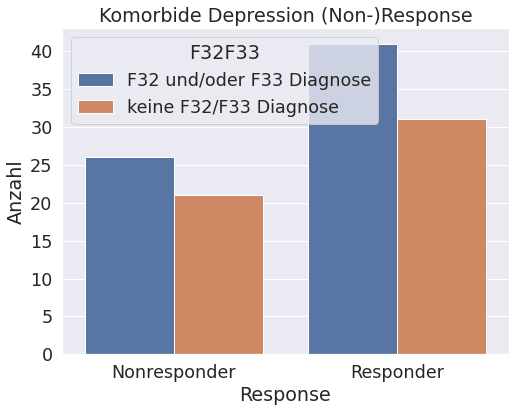

In [295]:
# Bar plot with counts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=df_resp_F32,
            y='Anzahl',
            x='Response',
            hue='F32F33', 
            ax=ax)

ax.set_title('Komorbide Depression (Non-)Response')
ax.set_ylabel('Anzahl')
ax.set_xticklabels(['Nonresponder', 'Responder'])
plt.show()

### Visualize EEG variables

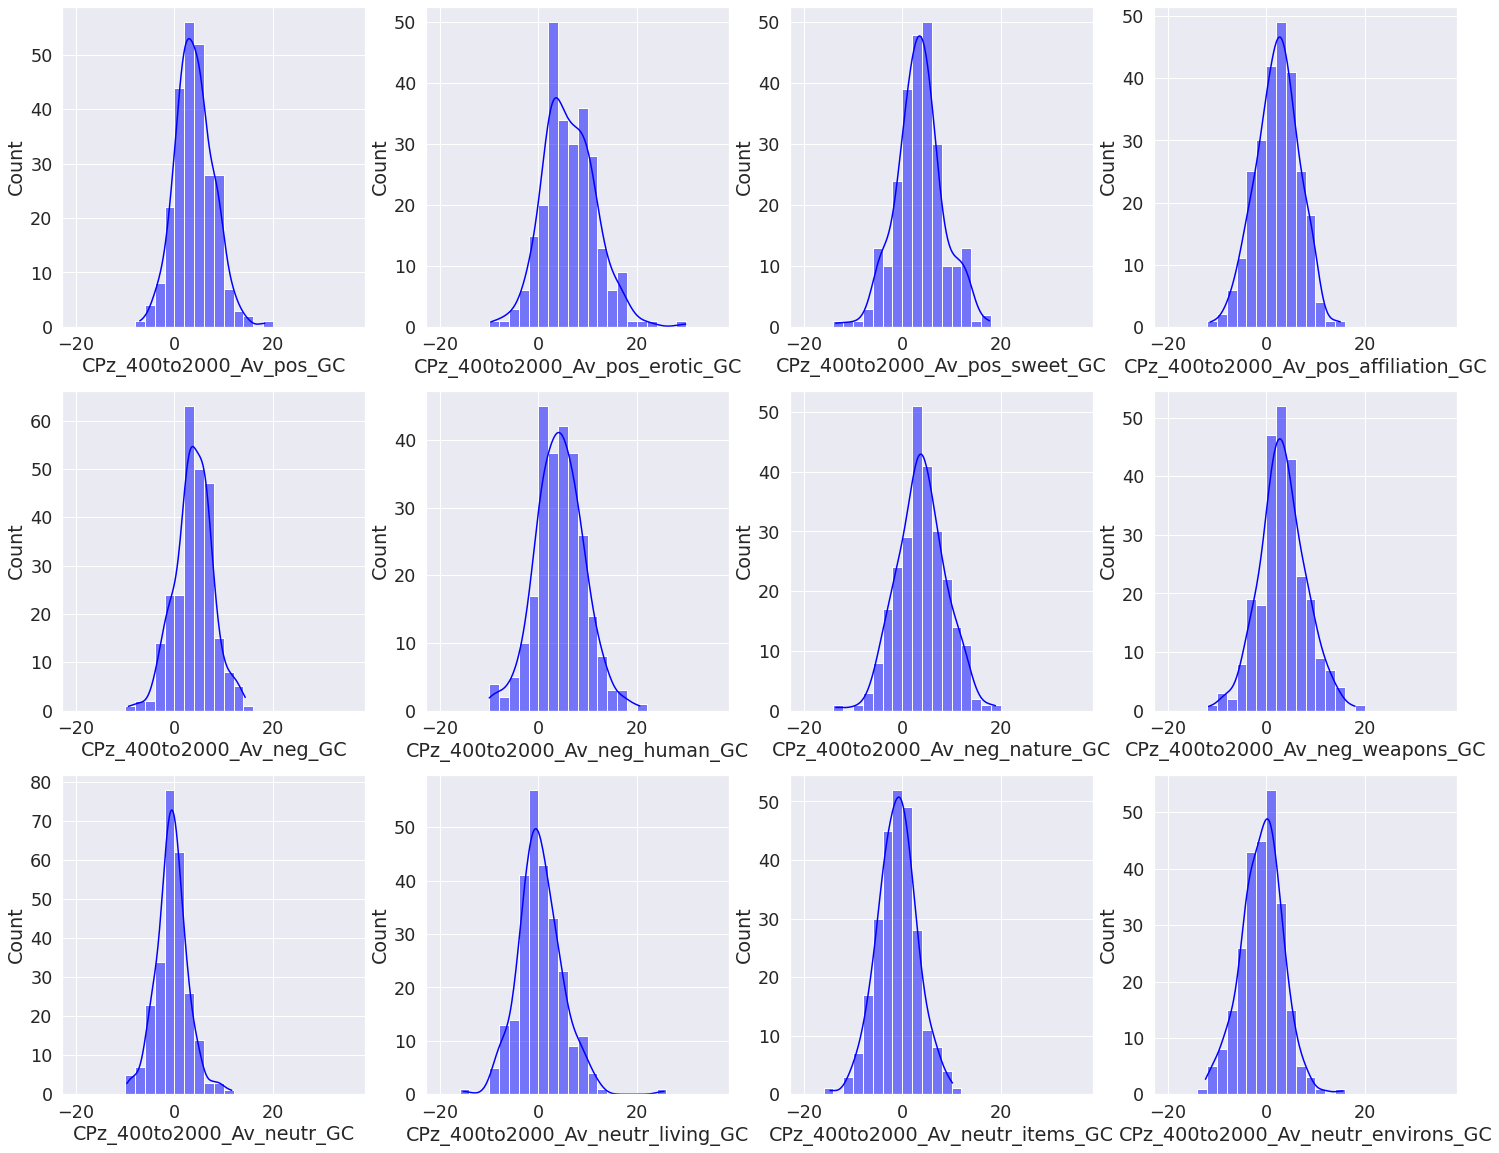

In [296]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(174,186):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="blue", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

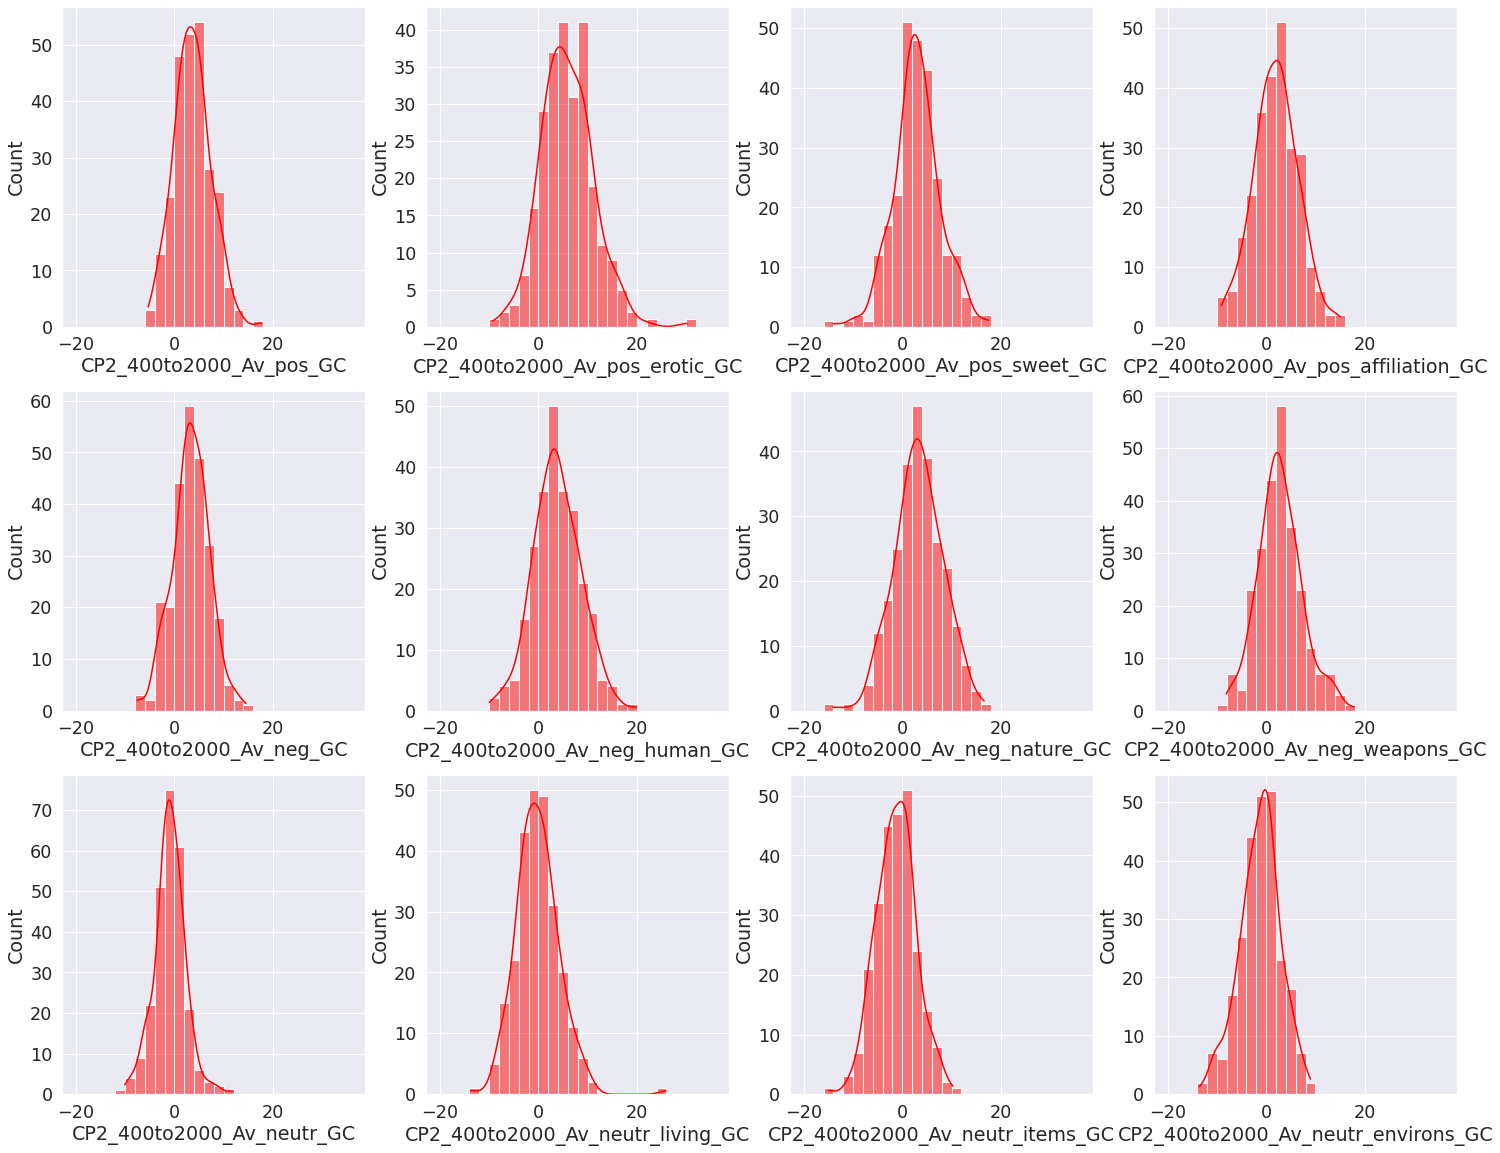

In [297]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(186,198):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="red", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

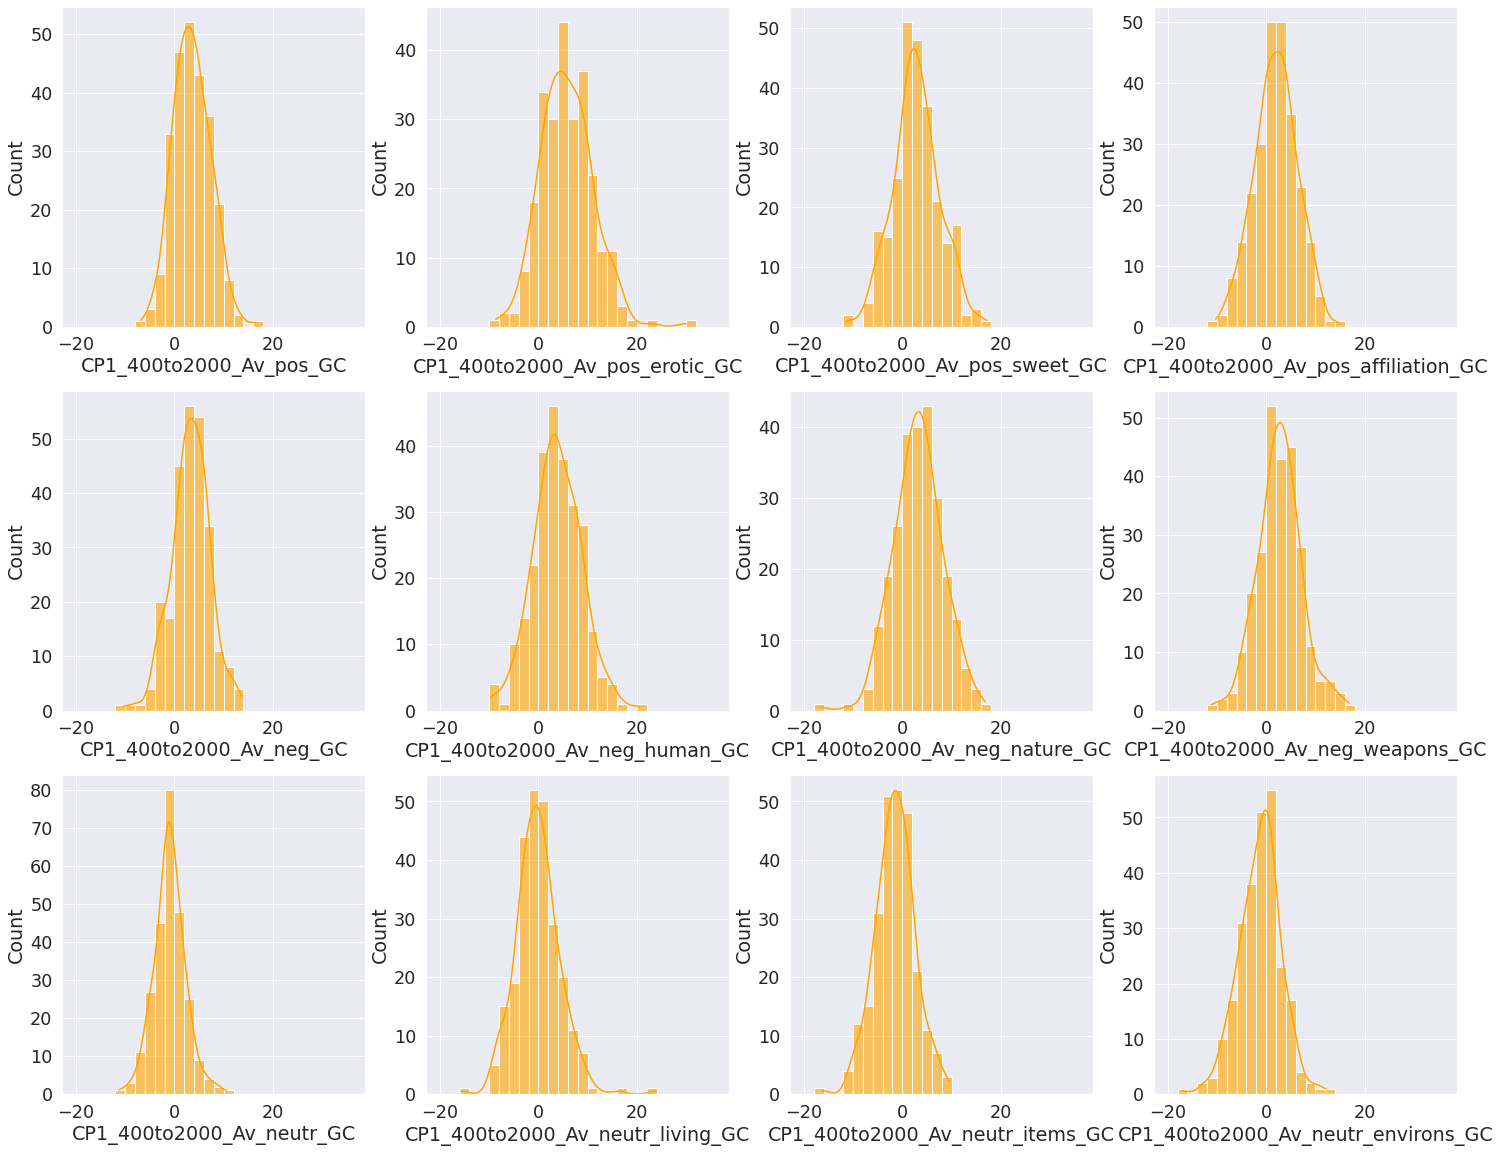

In [298]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(198,210):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="orange", binrange=(-20,35), binwidth=2, kde=True, alpha=0.6, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

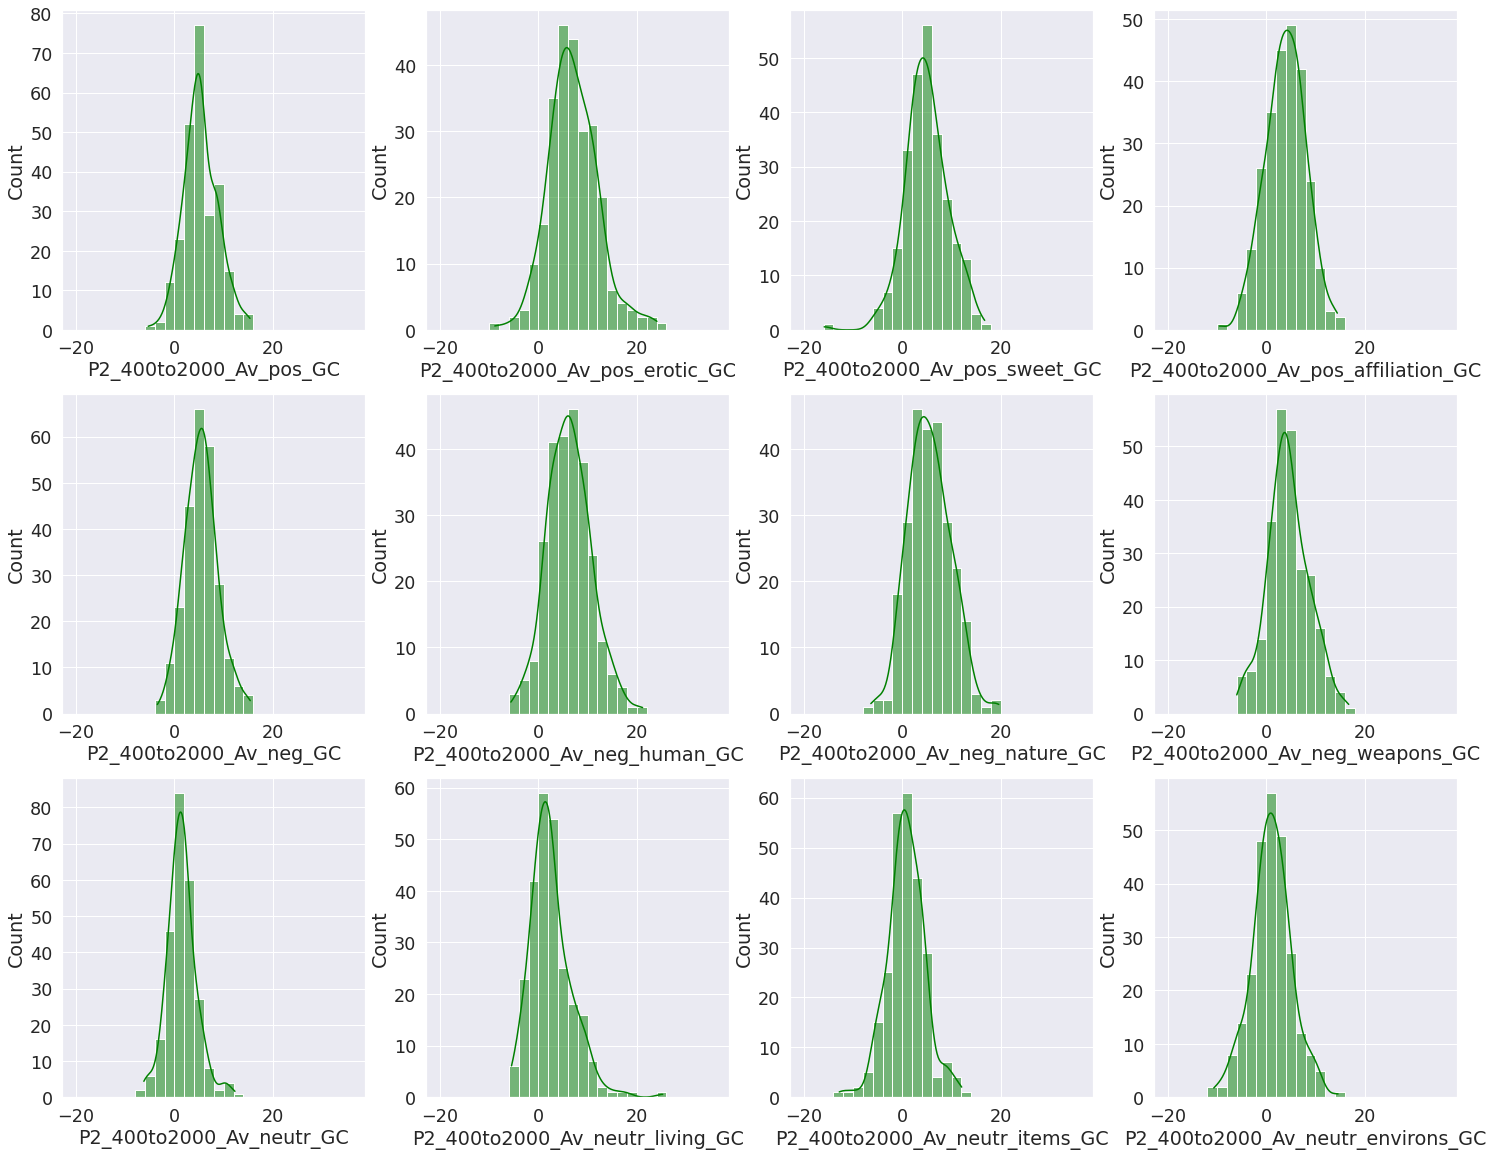

In [299]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(210,222):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="green", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

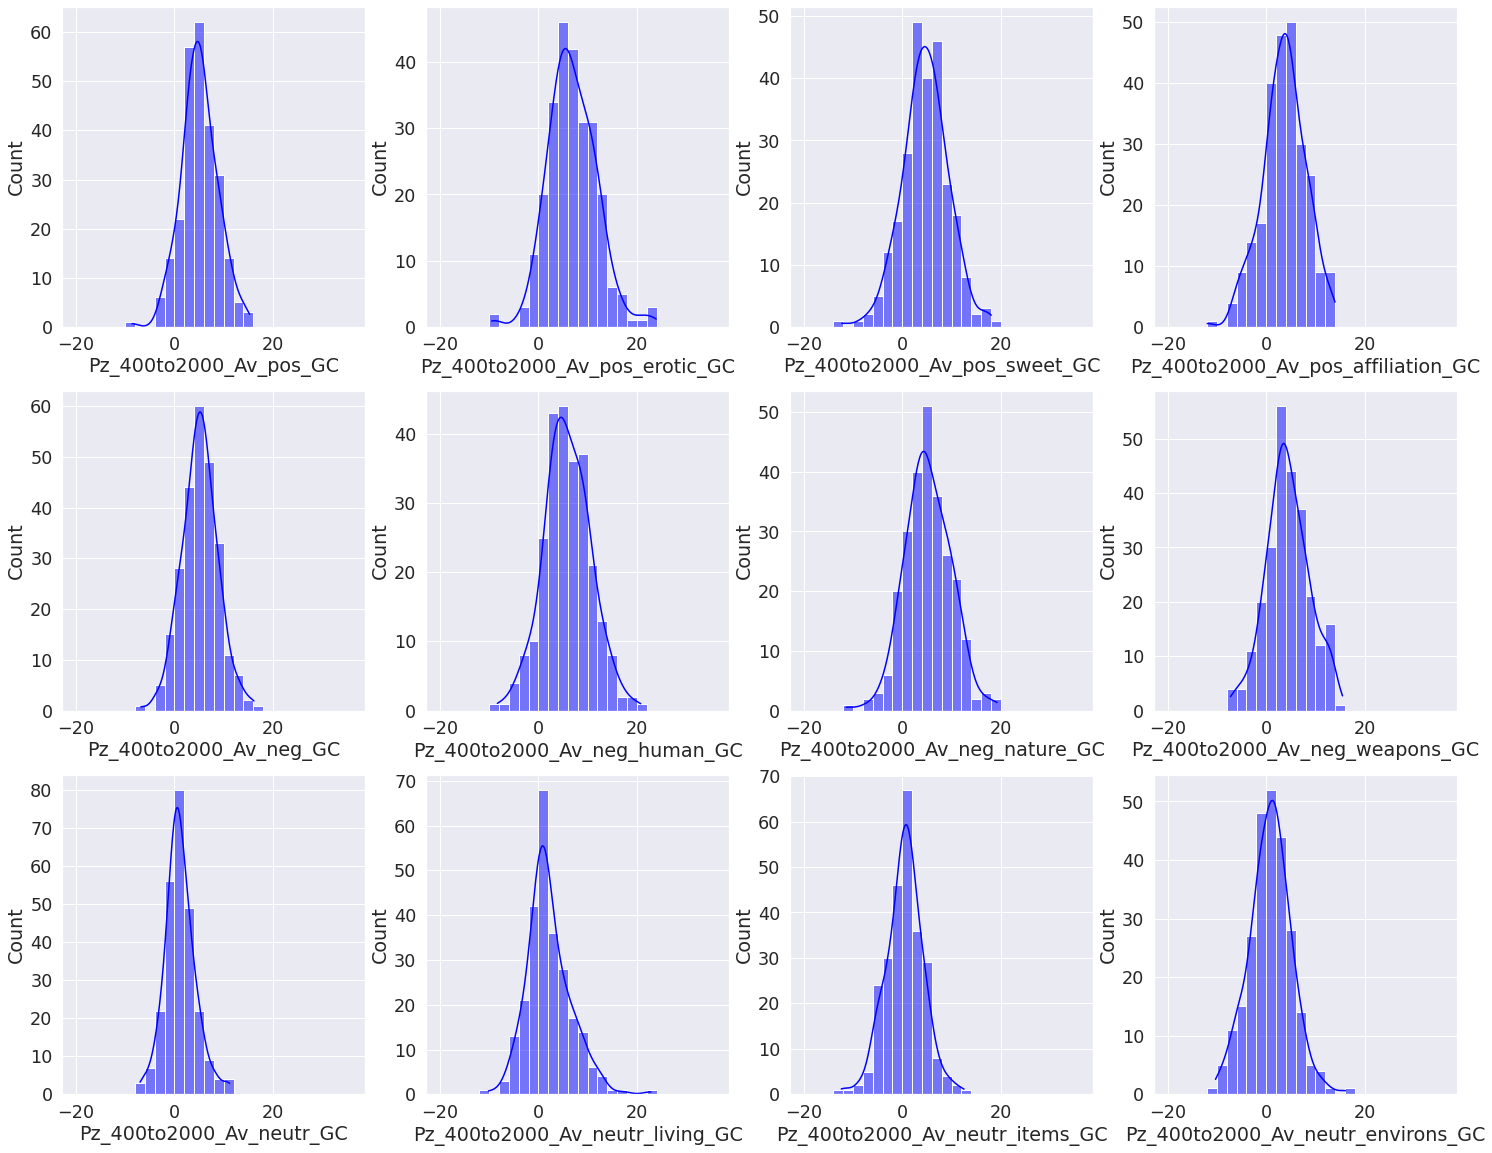

In [300]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(222,234):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="blue", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

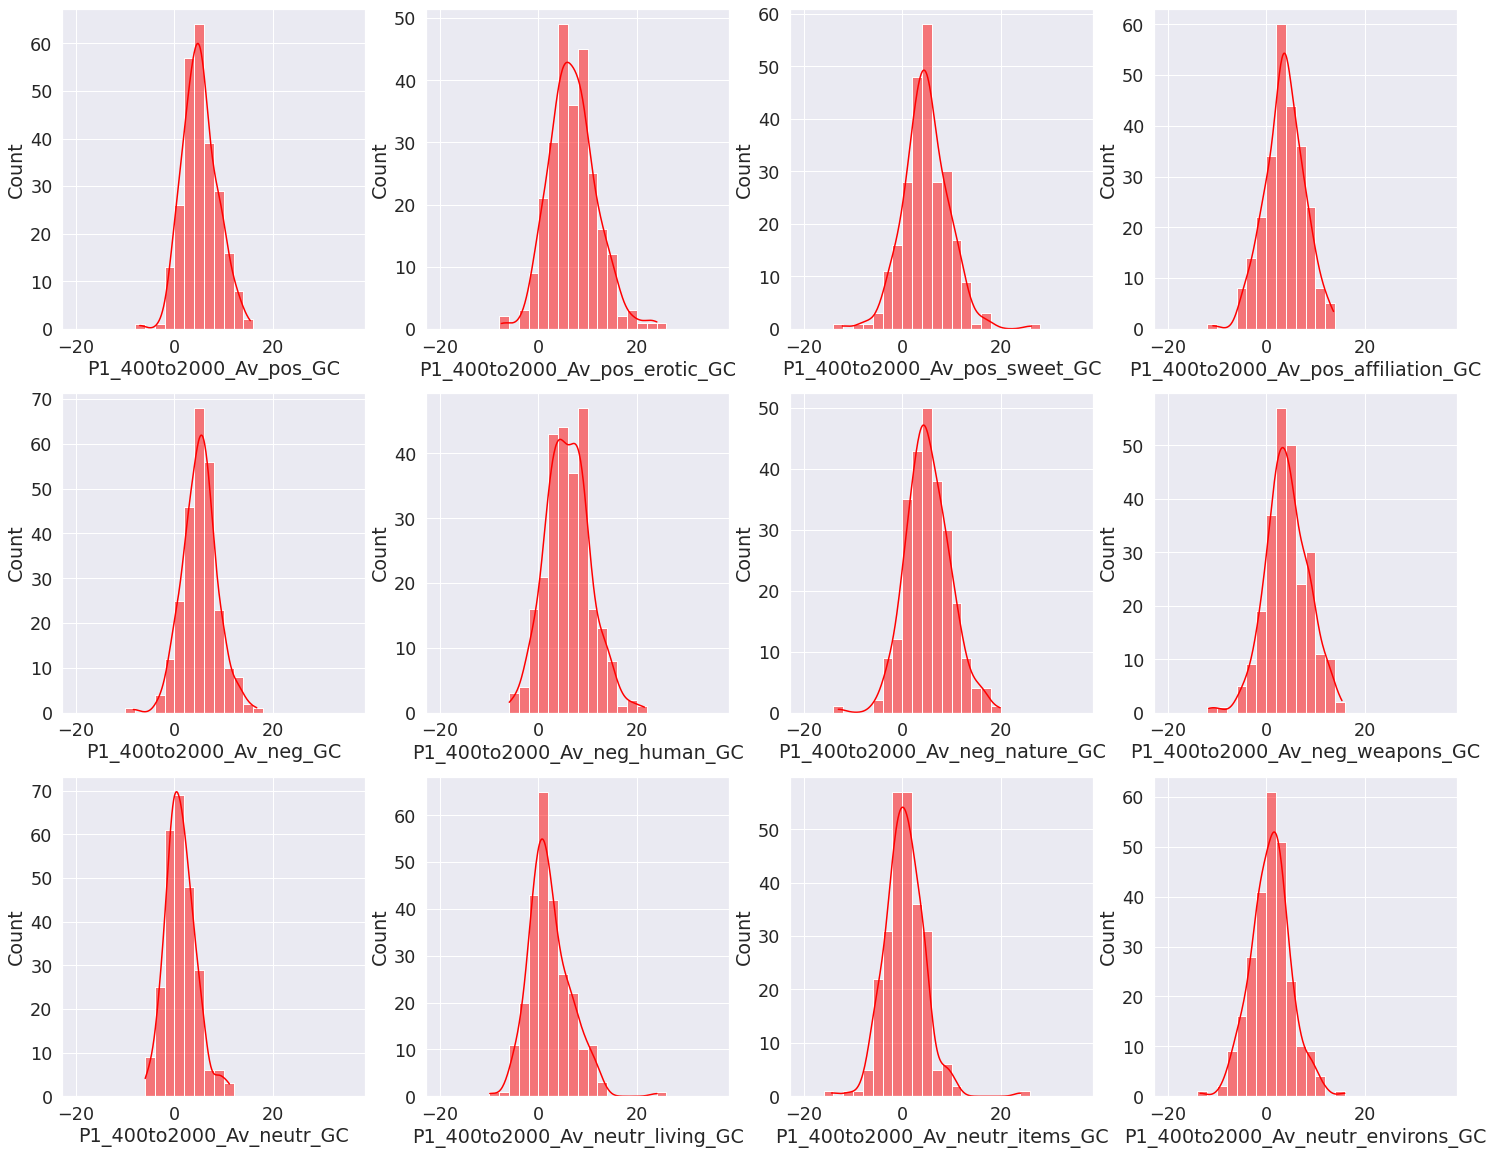

In [301]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(234,246):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="red", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

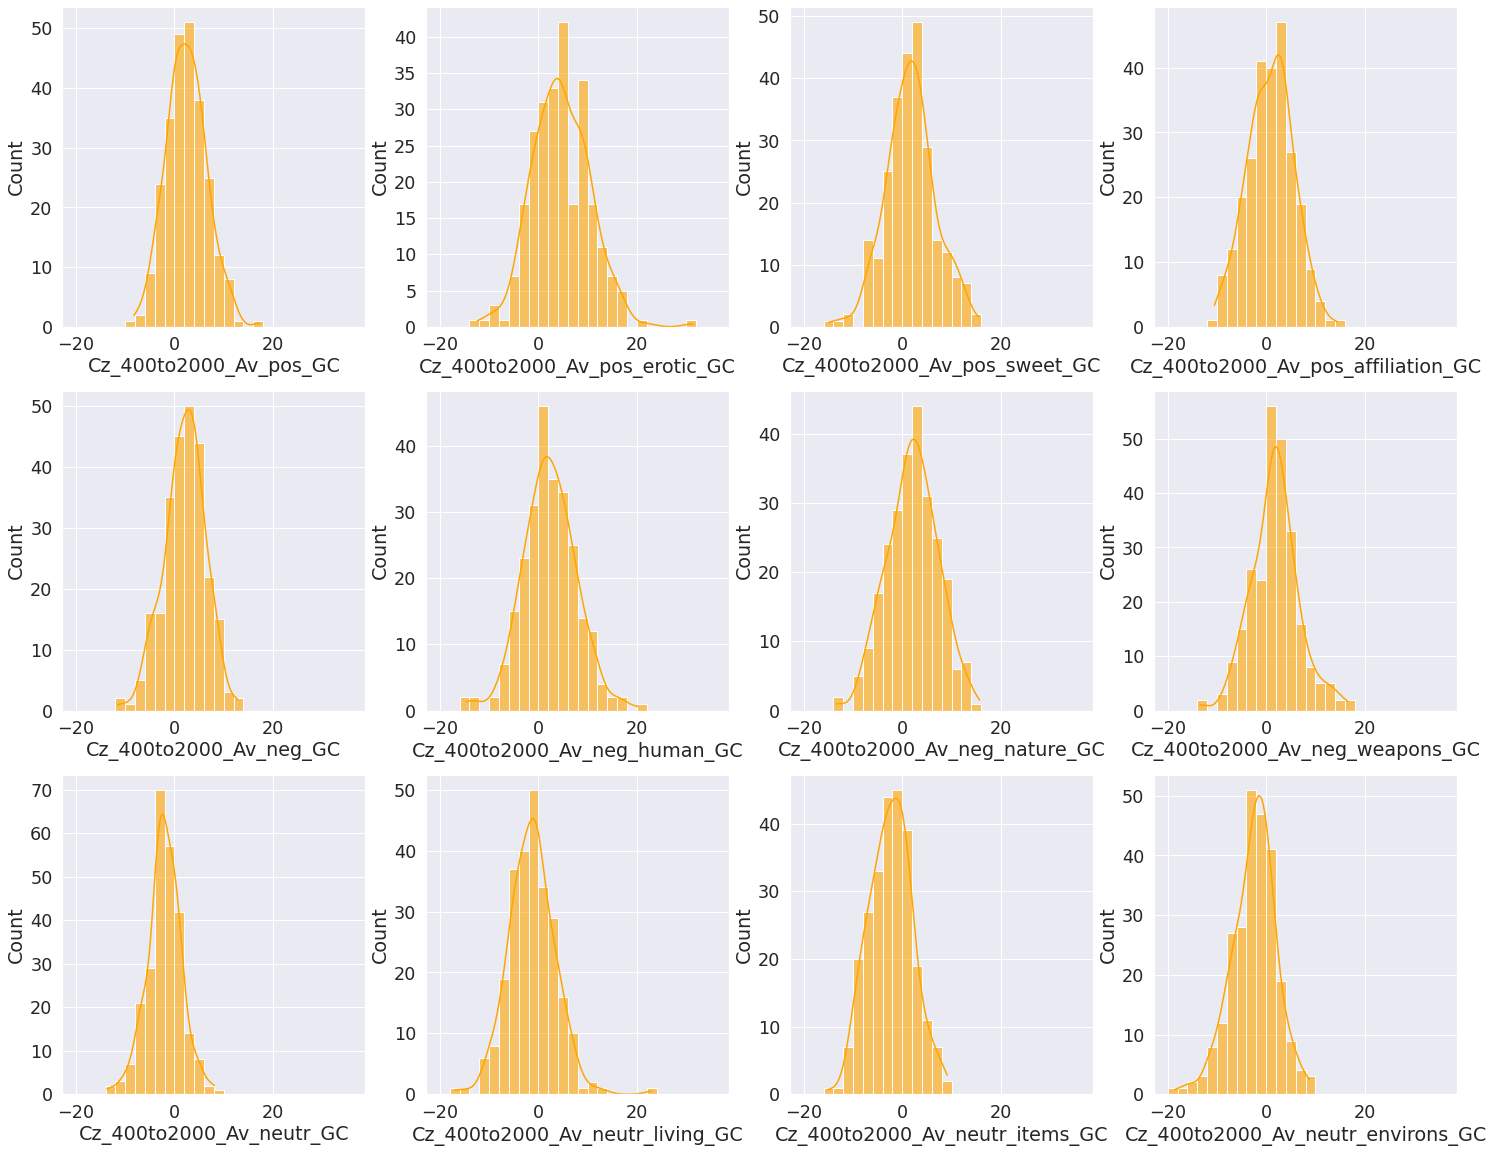

In [302]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(246,258):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="orange", binrange=(-20,35), binwidth=2, kde=True, alpha=0.6, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

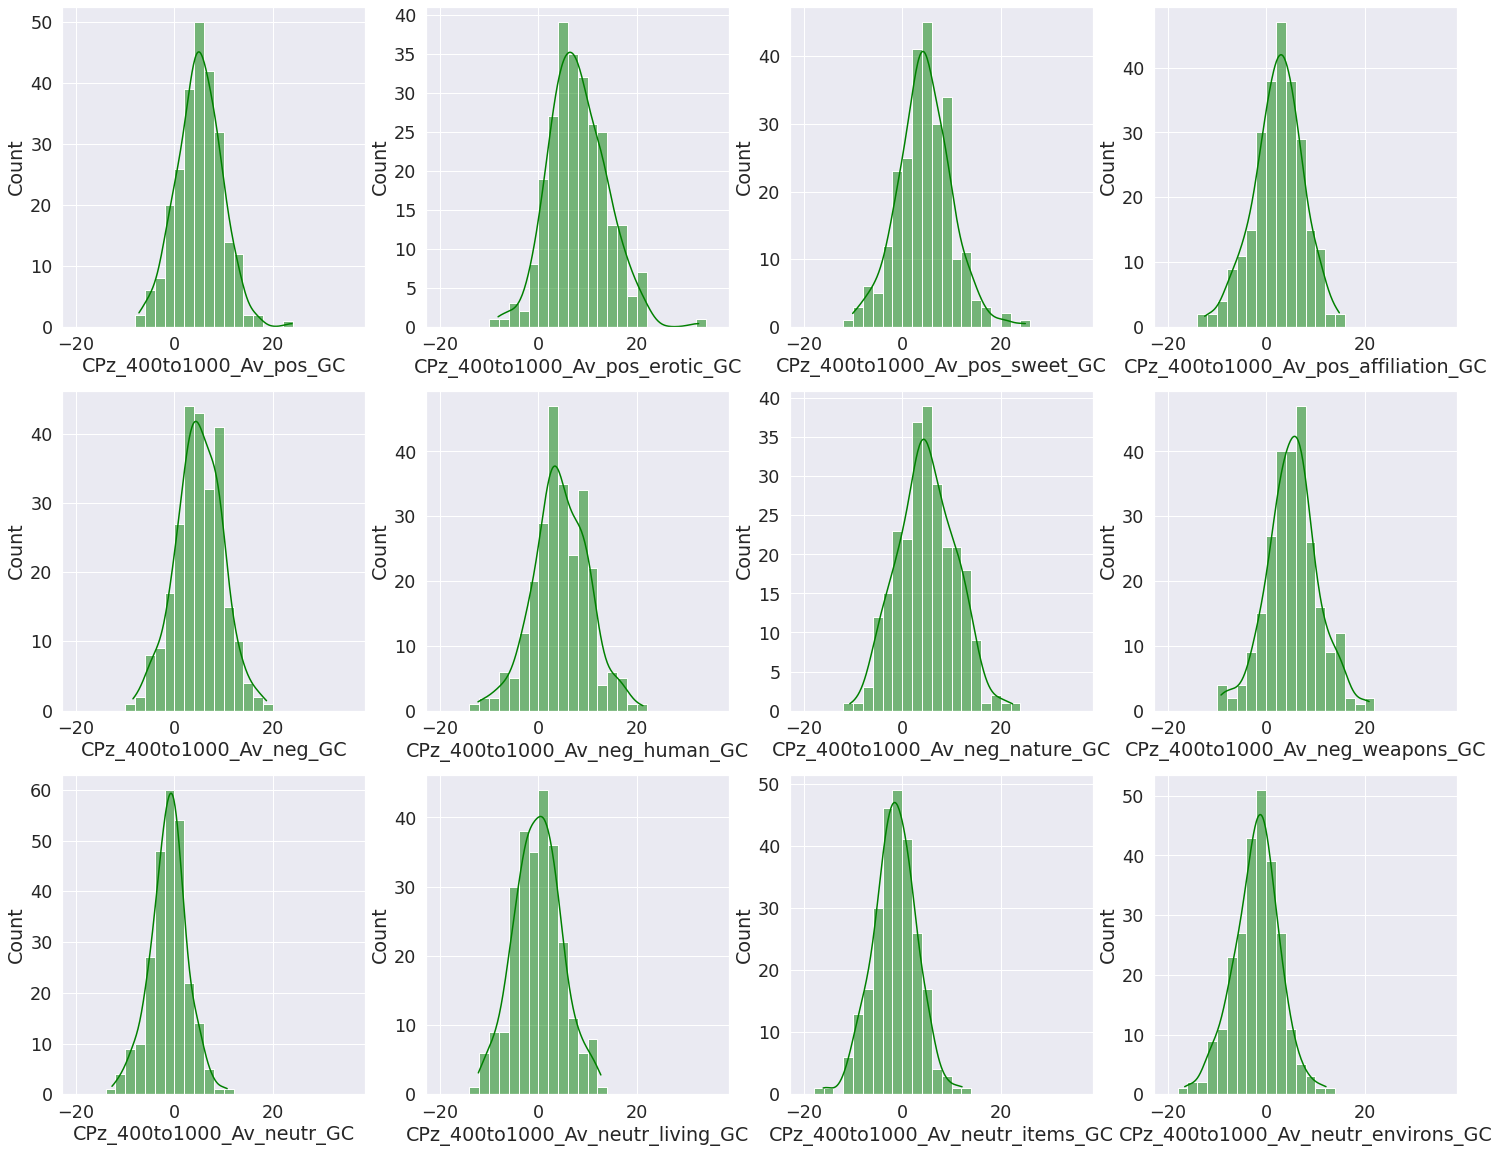

In [303]:
f, axes = plt.subplots(3, 4, figsize=(25, 20))


cnt=0
col=[0,1,2,3,0,1,2,3,0,1,2,3]
row=[0,0,0,0,1,1,1,1,2,2,2,2]

for ieeg in range(258,270):
    sns.set(font_scale=1.6)
    sns.histplot(epoc.iloc[:,ieeg], color="green", binrange=(-20,35), binwidth=2, kde=True, alpha=0.5, ax=axes[row[cnt], col[cnt]])
    
    cnt=cnt+1

### Delete subjects/ variables